In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import pipeline

#from google.colab import drive
#drive.mount('/content/drive')
#workdir = "/content/drive/My Drive/job_interview/"

workdir = ""

sns.set(style="darkgrid", font_scale=1.4)
random_state = 42

def write_to_csv(filename, array):
  np.savetxt(filename, array, delimiter=",", fmt='%f.3')

## Data preprocessing

In [22]:
from sklearn import metrics, model_selection, preprocessing

In [24]:
train_df = pd.read_csv(workdir + "train.csv")
test_df = pd.read_csv(workdir + "test.csv")

In [97]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186590 entries, 0 to 186589
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   VASK0       186590 non-null  int64
 1   VASK1       186590 non-null  int64
 2   VASK2       186590 non-null  int64
 3   VASK3       186590 non-null  int64
 4   VASK4       186590 non-null  int64
 5   VBID0       186590 non-null  int64
 6   VBID1       186590 non-null  int64
 7   VBID2       186590 non-null  int64
 8   VBID3       186590 non-null  int64
 9   VBID4       186590 non-null  int64
 10  VASK0_PREV  186590 non-null  int64
 11  VASK1_PREV  186590 non-null  int64
 12  VASK2_PREV  186590 non-null  int64
 13  VASK3_PREV  186590 non-null  int64
 14  VASK4_PREV  186590 non-null  int64
 15  VBID0_PREV  186590 non-null  int64
 16  VBID1_PREV  186590 non-null  int64
 17  VBID2_PREV  186590 non-null  int64
 18  VBID3_PREV  186590 non-null  int64
 19  VBID4_PREV  186590 non-null  int64
 20  Y   

In [98]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93296 entries, 0 to 93295
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   VASK0       93296 non-null  int64
 1   VASK1       93296 non-null  int64
 2   VASK2       93296 non-null  int64
 3   VASK3       93296 non-null  int64
 4   VASK4       93296 non-null  int64
 5   VBID0       93296 non-null  int64
 6   VBID1       93296 non-null  int64
 7   VBID2       93296 non-null  int64
 8   VBID3       93296 non-null  int64
 9   VBID4       93296 non-null  int64
 10  VASK0_PREV  93296 non-null  int64
 11  VASK1_PREV  93296 non-null  int64
 12  VASK2_PREV  93296 non-null  int64
 13  VASK3_PREV  93296 non-null  int64
 14  VASK4_PREV  93296 non-null  int64
 15  VBID0_PREV  93296 non-null  int64
 16  VBID1_PREV  93296 non-null  int64
 17  VBID2_PREV  93296 non-null  int64
 18  VBID3_PREV  93296 non-null  int64
 19  VBID4_PREV  93296 non-null  int64
dtypes: int64(20)
memory usage: 1

In [99]:
train_df.describe()

,VASK0,VASK1,VASK2,VASK3,VASK4,VBID0,VBID1,VBID2,VBID3,VBID4,VASK0_PREV,VASK1_PREV,VASK2_PREV,VASK3_PREV,VASK4_PREV,VBID0_PREV,VBID1_PREV,VBID2_PREV,VBID3_PREV,VBID4_PREV,Y
count,186590.000000,186590.000000,186590.000000,186590.000000,186590.000000,186590.000000,186590.000000,186590.000000,186590.000000,186590.000000,186590.000000,186590.000000,186590.000000,186590.000000,186590.000000,186590.000000,186590.000000,186590.000000,186590.000000,186590.000000,186590.000000
mean,92.788981,178.840495,204.462640,205.277978,202.079436,92.270245,177.477716,203.058487,202.174195,197.799646,92.823549,178.796431,204.430945,205.273975,202.076333,92.318286,177.438491,203.023479,202.169194,197.795123,0.010258
std,66.491713,62.138222,62.969816,65.644839,67.571850,65.281200,59.409587,58.546985,59.286325,61.265705,66.590938,62.173445,62.981647,65.646947,67.573708,65.376130,59.444964,58.557993,59.289762,61.263966,0.100760
min,1.000000,1.000000,5.000000,1.000000,9.000000,1.000000,1.000000,1.000000,4.000000,3.000000,1.000000,1.000000,5.000000,1.000000,9.000000,1.000000,1.000000,1.000000,4.000000,3.000000,0.000000
25%,41.000000,138.000000,162.000000,161.000000,156.000000,40.000000,137.000000,162.000000,161.000000,156.000000,41.000000,138.000000,162.000000,161.000000,156.000000,40.000000,136.000000,162.000000,161.000000,156.000000,0.000000
50%,83.000000,170.000000,196.000000,194.000000,189.000000,83.000000,170.000000,197.000000,195.000000,188.000000,83.000000,170.000000,196.000000,194.000000,189.000000,83.000000,170.000000,197.000000,195.000000,188.000000,0.000000
75%,131.000000,210.000000,232.000000,234.000000,232.000000,132.000000,211.000000,234.000000,233.000000,228.000000,132.000000,210.000000,232.000000,234.000000,232.000000,132.000000,211.000000,234.000000,233.000000,228.000000,0.000000
max,647.000000,784.000000,666.000000,813.000000,738.000000,593.000000,657.000000,683.000000,687.000000,718.000000,647.000000,784.000000,666.000000,813.000000,738.000000,593.000000,657.000000,683.000000,687.000000,718.000000,1.000000


**Видим, что классы сильно не сбалансированны. Это может повлиять на работу не вероятностных моделей, например для SVM нужно будет сделать оверсемплинг**

In [25]:
X = train_df.values[:, :-1].astype(int)
y = train_df.values[:, -1]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size=0.33)

print(X_train.shape, X_test.shape)

(125015, 20) (61575, 20)


## Data visualization

In [26]:
from sklearn import decomposition

In [102]:
prev_labels = ["VASK0_PREV", "VASK1_PREV", "VASK2_PREV", "VASK3_PREV", "VASK4_PREV",
               "VBID0_PREV", "VBID1_PREV", "VBID2_PREV", "VBID3_PREV", "VBID4_PREV"]

current_labels = ["VASK0", "VASK1", "VASK2", "VASK3", "VASK4",
                  "VBID0", "VBID1", "VBID2", "VBID3", "VBID4"]

In [103]:
sns.pairplot(train_df, vars=current_labels)

Output hidden; open in https://colab.research.google.com to view.

In [104]:
sns.pairplot(train_df, vars=prev_labels)

Output hidden; open in https://colab.research.google.com to view.

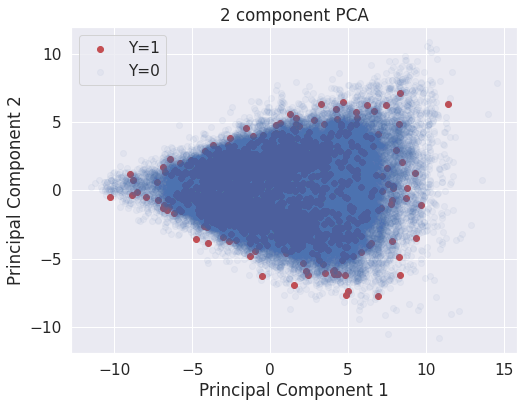

In [151]:
pca = decomposition.PCA(random_state=random_state)
principalComponents = pca.fit_transform(preprocessing.StandardScaler().fit_transform(X))

plt.figure(figsize = (8,6))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2 component PCA")

plt.scatter(principalComponents[y == 1, 0], 
            principalComponents[y == 1, 1],
            color="r",
            label="Y=1")

plt.scatter(principalComponents[y == 0, 0], 
            principalComponents[y == 0, 1],
            color="b",
            label="Y=0",
            alpha=0.05)

plt.legend()
plt.show()

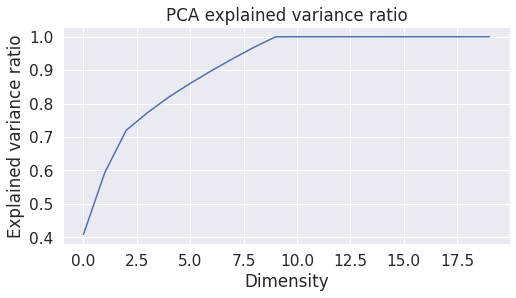

[0.40826049 0.59367094 0.71991229 0.77291569 0.81962339 0.86048035
 0.89864776 0.93471454 0.96898284 0.99986053 0.99990668 0.99994941
 0.99996159 0.99997134 0.99997964 0.99998703 0.99999153 0.99999533
 0.99999829 1.        ]
проекция на 10 главных компонент объясняет 99% дисперсии


In [154]:
explained_var_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize = (8,4))
plt.plot(explained_var_ratio)
plt.title("PCA explained variance ratio")
plt.xlabel("Dimensity")
plt.ylabel("Explained variance ratio")

plt.show()

print(explained_var_ratio)
print(
    "проекция на {} главных компонент объясняет 99% дисперсии".format(np.round(
        explained_var_ratio, decimals=2).argmax() + 1)
     )

## Models

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

**Используем RF как baseline**

In [16]:
rf = RandomForestClassifier(random_state=random_state, n_jobs=8)

In [158]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=8,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [159]:
print("RF roc_auc score:", metrics.roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

RF roc_auc score: 0.8328188541814441


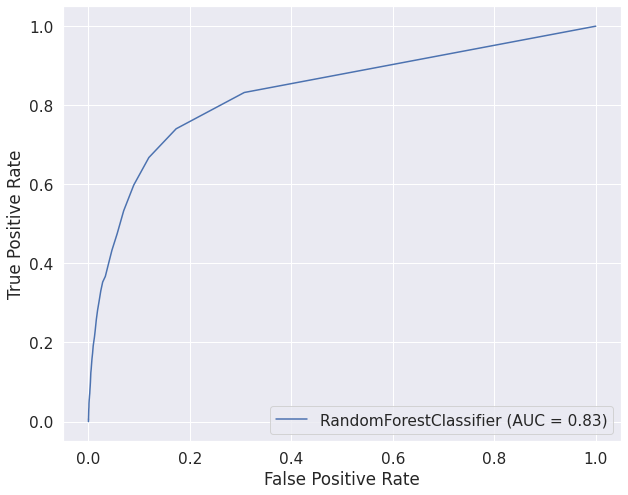

In [160]:
plt.figure(figsize=(10,8))
metrics.plot_roc_curve(estimator=rf, X=X_test, y=y_test, ax=plt.gca())
plt.show()

**Random forest feature importance**

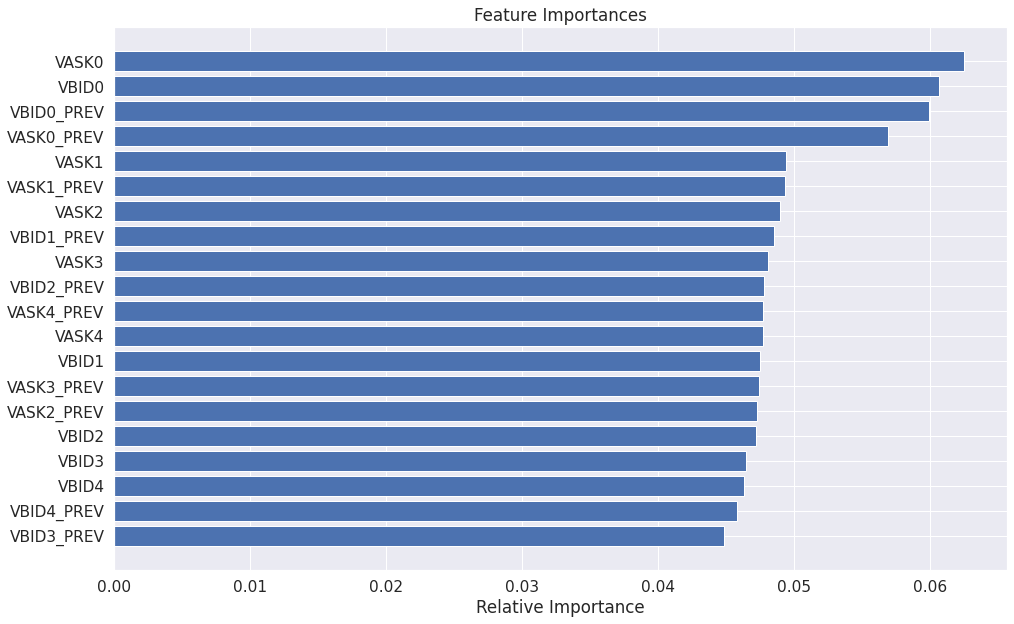

In [20]:
features = train_df.drop(["Y"], axis=1).columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(16, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Логистическая регрессия**

In [161]:
log_regr = LogisticRegression(random_state=random_state, n_jobs=8, solver="saga", max_iter=500, verbose=1)
scaler = preprocessing.StandardScaler()
pipe_logistic = pipeline.Pipeline(steps=[("scaler", scaler), ("logistic", log_regr)])

pipe_logistic

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=500,
                                    multi_class='auto', n_jobs=8, penalty='l2',
                                    random_state=42, solver='saga', tol=0.0001,
                                    verbose=1, warm_start=False))],
         verbose=False)

In [162]:
param_grid = {
    "logistic__C" : np.logspace(-4, 4, 4),
    "logistic__penalty" : ["l1", "l2"]
}

cv = model_selection.StratifiedShuffleSplit(n_splits=2, test_size=0.33, random_state=random_state)
search = model_selection.GridSearchCV(pipe_logistic, param_grid, cv=cv, n_jobs=8, scoring="roc_auc")
search.fit(X, y)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

pipe_logistic = search.best_estimator_

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


max_iter reached after 74 seconds
Best parameter (CV score=0.691):
{'logistic__C': 21.54434690031882, 'logistic__penalty': 'l1'}


The max_iter was reached which means the coef_ did not converge
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:  1.2min finished


In [24]:
pipe_logistic.fit(X_train, y_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


max_iter reached after 42 seconds


The max_iter was reached which means the coef_ did not converge
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   42.6s finished


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logistic',
                 LogisticRegression(C=10000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=500,
                                    multi_class='auto', n_jobs=8, penalty='l1',
                                    random_state=42, solver='saga', tol=0.0001,
                                    verbose=1, warm_start=False))],
         verbose=False)

Log regr roc_auc: 0.7066953204041877


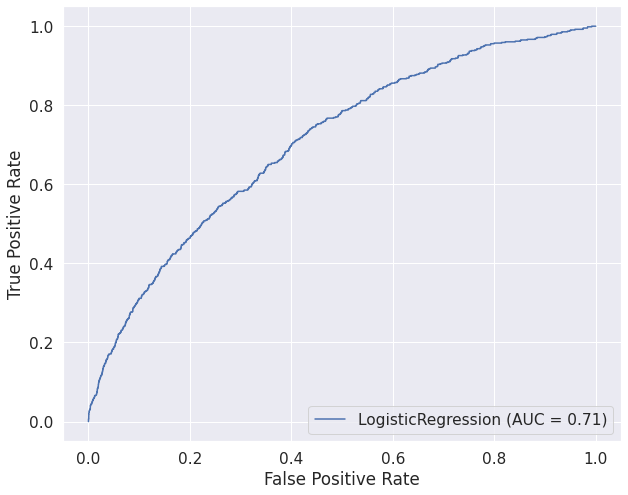

In [25]:
print("Log regr roc_auc:", metrics.roc_auc_score(y_test, pipe_logistic.predict_proba(X_test)[:, 1]))

plt.figure(figsize=(10,8))
metrics.plot_roc_curve(estimator=pipe_logistic["logistic"], X=pipe_logistic[:-1].transform(X_test), y=y_test, ax=plt.gca())
plt.show()

**Логистическая регрессия над полиномиальными фичами:**

**Degree = 2**

In [26]:
log_regr = LogisticRegression(random_state=random_state, n_jobs=8, solver="saga", max_iter=500, C=5, penalty="l2", verbose=1)
scaler = preprocessing.StandardScaler()
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)

pipe_logistic_poly = pipeline.Pipeline(steps=[("poly", poly), ("scaler", scaler), ("logistic", log_regr)])
pipe_logistic_poly

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logistic',
                 LogisticRegression(C=5, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=500,
                                    multi_class='auto', n_jobs=8, penalty='l2',
                                    random_state=42, solver='saga', tol=0.0001,
                                    verbose=1, warm_start=False))],
         verbose=False)

In [163]:
param_grid = {
    "logistic__C" : np.logspace(-4, 4, 4),
    "logistic__penalty" : ["l1", "l2"]
}

cv = model_selection.StratifiedShuffleSplit(n_splits=2, test_size=0.33, random_state=random_state)
search = model_selection.GridSearchCV(pipe_logistic_poly, param_grid, cv=cv, n_jobs=8, scoring="roc_auc")
search.fit(X, y)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

pipe_logistic_poly = search.best_estimator_

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


max_iter reached after 407 seconds
Best parameter (CV score=0.882):
{'logistic__C': 21.54434690031882, 'logistic__penalty': 'l1'}


The max_iter was reached which means the coef_ did not converge
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:  6.8min finished


In [166]:
pipe_logistic_poly.fit(X_train, y_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


max_iter reached after 267 seconds


The max_iter was reached which means the coef_ did not converge
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:  4.4min finished


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logistic',
                 LogisticRegression(C=21.54434690031882, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=500, multi_class='auto', n_jobs=8,
                                    penalty='l1', random_state=42,
                                    solver='saga', tol=0.0001, verbose=1,
                                    warm_start=False))],
         verbose=False)

Log regr roc_auc: 0.8756452127813145


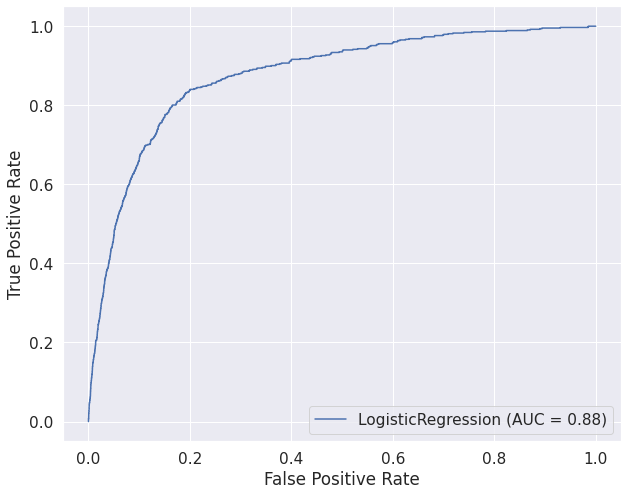

In [167]:
print("Log regr roc_auc:", metrics.roc_auc_score(y_test, pipe_logistic_poly.predict_proba(X_test)[:, 1]))

plt.figure(figsize=(10,8)) 
metrics.plot_roc_curve(estimator=pipe_logistic_poly["logistic"], X=pipe_logistic_poly[:-1].transform(X_test), y=y_test, ax=plt.gca())
plt.show()

In [168]:
pipe_logistic_poly.fit(X, y)
write_to_csv(workdir + "logistic_over_quadratic.csv",  np.round(pipe_logistic_poly.predict_proba(test_df.values)[:, 1], decimals=4))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


max_iter reached after 426 seconds


The max_iter was reached which means the coef_ did not converge
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:  7.1min finished


**Градиентный бустинг**

In [28]:
!pip install catboost
from catboost import CatBoostClassifier, Pool

In [29]:
pool = Pool(data=X, label=y)

catboost_clf = CatBoostClassifier(iterations=1000, random_state=random_state)

In [33]:
param_grid = {
    "depth" : [4, 6],
    "l2_leaf_reg" : [1, 3, 5, 7]
}

In [34]:
grid_search_results = catboost_clf.grid_search(param_grid, pool, shuffle=0, verbose=0)


bestTest = 0.04358586774
bestIteration = 759


bestTest = 0.04367718927
bestIteration = 839


bestTest = 0.04360081501
bestIteration = 868


bestTest = 0.04360832861
bestIteration = 757


bestTest = 0.04384499294
bestIteration = 608


bestTest = 0.04367082059
bestIteration = 684


bestTest = 0.04373348744
bestIteration = 762


bestTest = 0.04362422156
bestIteration = 811



In [45]:
best_params = grid_search_results['params']

In [46]:
catboost_clf.fit(X, y)

0:	learn: 0.6282940	total: 26.3ms	remaining: 26.2s
1:	learn: 0.5698455	total: 51.5ms	remaining: 25.7s
2:	learn: 0.5145754	total: 83.5ms	remaining: 27.8s
3:	learn: 0.4677243	total: 109ms	remaining: 27.1s
4:	learn: 0.4257918	total: 132ms	remaining: 26.2s
5:	learn: 0.3882639	total: 158ms	remaining: 26.1s
6:	learn: 0.3547023	total: 193ms	remaining: 27.4s
7:	learn: 0.3247192	total: 225ms	remaining: 28s
8:	learn: 0.2979234	total: 255ms	remaining: 28.1s
9:	learn: 0.2740358	total: 289ms	remaining: 28.6s
10:	learn: 0.2485466	total: 317ms	remaining: 28.5s
11:	learn: 0.2298775	total: 341ms	remaining: 28.1s
12:	learn: 0.2098960	total: 376ms	remaining: 28.5s
13:	learn: 0.1937042	total: 421ms	remaining: 29.7s
14:	learn: 0.1807406	total: 446ms	remaining: 29.3s
15:	learn: 0.1691273	total: 494ms	remaining: 30.4s
16:	learn: 0.1574020	total: 520ms	remaining: 30.1s
17:	learn: 0.1477387	total: 547ms	remaining: 29.8s
18:	learn: 0.1394372	total: 583ms	remaining: 30.1s
19:	learn: 0.1310359	total: 604ms	remain

161:	learn: 0.0434174	total: 4.15s	remaining: 21.5s
162:	learn: 0.0434077	total: 4.18s	remaining: 21.5s
163:	learn: 0.0434001	total: 4.2s	remaining: 21.4s
164:	learn: 0.0433862	total: 4.22s	remaining: 21.4s
165:	learn: 0.0433627	total: 4.24s	remaining: 21.3s
166:	learn: 0.0433422	total: 4.26s	remaining: 21.3s
167:	learn: 0.0433313	total: 4.28s	remaining: 21.2s
168:	learn: 0.0433146	total: 4.3s	remaining: 21.1s
169:	learn: 0.0433051	total: 4.32s	remaining: 21.1s
170:	learn: 0.0432947	total: 4.34s	remaining: 21s
171:	learn: 0.0432848	total: 4.36s	remaining: 21s
172:	learn: 0.0432717	total: 4.39s	remaining: 21s
173:	learn: 0.0432607	total: 4.41s	remaining: 20.9s
174:	learn: 0.0432523	total: 4.43s	remaining: 20.9s
175:	learn: 0.0432442	total: 4.45s	remaining: 20.9s
176:	learn: 0.0432321	total: 4.47s	remaining: 20.8s
177:	learn: 0.0432216	total: 4.49s	remaining: 20.8s
178:	learn: 0.0432138	total: 4.51s	remaining: 20.7s
179:	learn: 0.0432028	total: 4.53s	remaining: 20.7s
180:	learn: 0.043188

328:	learn: 0.0419051	total: 7.81s	remaining: 15.9s
329:	learn: 0.0418963	total: 7.83s	remaining: 15.9s
330:	learn: 0.0418907	total: 7.85s	remaining: 15.9s
331:	learn: 0.0418860	total: 7.87s	remaining: 15.8s
332:	learn: 0.0418777	total: 7.89s	remaining: 15.8s
333:	learn: 0.0418738	total: 7.92s	remaining: 15.8s
334:	learn: 0.0418675	total: 7.93s	remaining: 15.8s
335:	learn: 0.0418612	total: 7.95s	remaining: 15.7s
336:	learn: 0.0418588	total: 7.97s	remaining: 15.7s
337:	learn: 0.0418466	total: 8s	remaining: 15.7s
338:	learn: 0.0418398	total: 8.02s	remaining: 15.6s
339:	learn: 0.0418337	total: 8.04s	remaining: 15.6s
340:	learn: 0.0418277	total: 8.06s	remaining: 15.6s
341:	learn: 0.0418204	total: 8.09s	remaining: 15.6s
342:	learn: 0.0418134	total: 8.11s	remaining: 15.5s
343:	learn: 0.0418081	total: 8.13s	remaining: 15.5s
344:	learn: 0.0418018	total: 8.15s	remaining: 15.5s
345:	learn: 0.0417954	total: 8.17s	remaining: 15.4s
346:	learn: 0.0417910	total: 8.19s	remaining: 15.4s
347:	learn: 0.0

492:	learn: 0.0410660	total: 11.4s	remaining: 11.8s
493:	learn: 0.0410600	total: 11.5s	remaining: 11.8s
494:	learn: 0.0410565	total: 11.5s	remaining: 11.7s
495:	learn: 0.0410514	total: 11.5s	remaining: 11.7s
496:	learn: 0.0410460	total: 11.5s	remaining: 11.7s
497:	learn: 0.0410428	total: 11.6s	remaining: 11.7s
498:	learn: 0.0410385	total: 11.6s	remaining: 11.6s
499:	learn: 0.0410347	total: 11.6s	remaining: 11.6s
500:	learn: 0.0410312	total: 11.6s	remaining: 11.6s
501:	learn: 0.0410266	total: 11.6s	remaining: 11.5s
502:	learn: 0.0410224	total: 11.7s	remaining: 11.5s
503:	learn: 0.0410191	total: 11.7s	remaining: 11.5s
504:	learn: 0.0410142	total: 11.7s	remaining: 11.5s
505:	learn: 0.0410092	total: 11.7s	remaining: 11.5s
506:	learn: 0.0410043	total: 11.8s	remaining: 11.4s
507:	learn: 0.0410011	total: 11.8s	remaining: 11.4s
508:	learn: 0.0409959	total: 11.8s	remaining: 11.4s
509:	learn: 0.0409925	total: 11.8s	remaining: 11.4s
510:	learn: 0.0409894	total: 11.8s	remaining: 11.3s
511:	learn: 

657:	learn: 0.0404315	total: 15.3s	remaining: 7.96s
658:	learn: 0.0404272	total: 15.3s	remaining: 7.94s
659:	learn: 0.0404231	total: 15.4s	remaining: 7.92s
660:	learn: 0.0404199	total: 15.4s	remaining: 7.89s
661:	learn: 0.0404158	total: 15.4s	remaining: 7.87s
662:	learn: 0.0404128	total: 15.4s	remaining: 7.84s
663:	learn: 0.0404106	total: 15.5s	remaining: 7.82s
664:	learn: 0.0404073	total: 15.5s	remaining: 7.79s
665:	learn: 0.0404040	total: 15.5s	remaining: 7.77s
666:	learn: 0.0404002	total: 15.5s	remaining: 7.75s
667:	learn: 0.0403970	total: 15.5s	remaining: 7.72s
668:	learn: 0.0403935	total: 15.6s	remaining: 7.7s
669:	learn: 0.0403887	total: 15.6s	remaining: 7.68s
670:	learn: 0.0403864	total: 15.6s	remaining: 7.66s
671:	learn: 0.0403817	total: 15.6s	remaining: 7.63s
672:	learn: 0.0403789	total: 15.7s	remaining: 7.61s
673:	learn: 0.0403768	total: 15.7s	remaining: 7.58s
674:	learn: 0.0403739	total: 15.7s	remaining: 7.56s
675:	learn: 0.0403689	total: 15.7s	remaining: 7.54s
676:	learn: 0

817:	learn: 0.0398905	total: 19.2s	remaining: 4.28s
818:	learn: 0.0398876	total: 19.2s	remaining: 4.25s
819:	learn: 0.0398858	total: 19.3s	remaining: 4.23s
820:	learn: 0.0398838	total: 19.3s	remaining: 4.2s
821:	learn: 0.0398797	total: 19.3s	remaining: 4.18s
822:	learn: 0.0398780	total: 19.3s	remaining: 4.16s
823:	learn: 0.0398745	total: 19.4s	remaining: 4.13s
824:	learn: 0.0398721	total: 19.4s	remaining: 4.11s
825:	learn: 0.0398685	total: 19.4s	remaining: 4.08s
826:	learn: 0.0398635	total: 19.4s	remaining: 4.06s
827:	learn: 0.0398605	total: 19.4s	remaining: 4.04s
828:	learn: 0.0398544	total: 19.5s	remaining: 4.02s
829:	learn: 0.0398495	total: 19.5s	remaining: 3.99s
830:	learn: 0.0398463	total: 19.5s	remaining: 3.97s
831:	learn: 0.0398430	total: 19.5s	remaining: 3.95s
832:	learn: 0.0398391	total: 19.6s	remaining: 3.92s
833:	learn: 0.0398360	total: 19.6s	remaining: 3.9s
834:	learn: 0.0398315	total: 19.6s	remaining: 3.88s
835:	learn: 0.0398286	total: 19.6s	remaining: 3.85s
836:	learn: 0.

976:	learn: 0.0393863	total: 23.2s	remaining: 546ms
977:	learn: 0.0393840	total: 23.2s	remaining: 523ms
978:	learn: 0.0393799	total: 23.3s	remaining: 499ms
979:	learn: 0.0393783	total: 23.3s	remaining: 475ms
980:	learn: 0.0393756	total: 23.3s	remaining: 451ms
981:	learn: 0.0393732	total: 23.3s	remaining: 428ms
982:	learn: 0.0393675	total: 23.4s	remaining: 404ms
983:	learn: 0.0393653	total: 23.4s	remaining: 380ms
984:	learn: 0.0393613	total: 23.4s	remaining: 356ms
985:	learn: 0.0393590	total: 23.4s	remaining: 333ms
986:	learn: 0.0393571	total: 23.5s	remaining: 309ms
987:	learn: 0.0393545	total: 23.5s	remaining: 285ms
988:	learn: 0.0393529	total: 23.5s	remaining: 261ms
989:	learn: 0.0393487	total: 23.5s	remaining: 238ms
990:	learn: 0.0393462	total: 23.6s	remaining: 214ms
991:	learn: 0.0393441	total: 23.6s	remaining: 190ms
992:	learn: 0.0393410	total: 23.6s	remaining: 166ms
993:	learn: 0.0393374	total: 23.6s	remaining: 143ms
994:	learn: 0.0393341	total: 23.7s	remaining: 119ms
995:	learn: 

In [47]:
write_to_csv(workdir + "catboost.csv",  np.round(catboost_clf.predict_proba(test_df.values)[:, 1], decimals=4))

In [48]:
catboost_clf.fit(X_train, y_train, verbose=0)

Cat boost roc_auc: 0.880905004198777


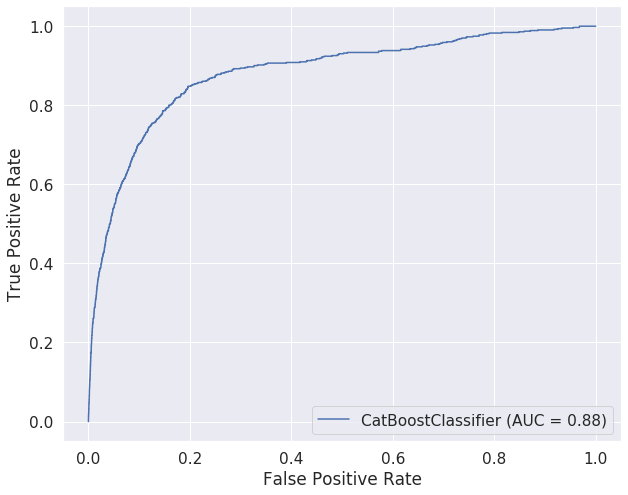

In [49]:
print("Cat boost roc_auc:", metrics.roc_auc_score(y_test, catboost_clf.predict_proba(X_test)[:, 1]))

plt.figure(figsize=(10,8))
metrics.plot_roc_curve(estimator=catboost_clf, X=X_test, y=y_test, ax=plt.gca())
plt.show()

**Logistic regression over CatBoost and RF Stacking**


In [50]:
from sklearn.ensemble import StackingClassifier

level0 = [("catboost", CatBoostClassifier(iterations=1000, random_state=42, **best_params)),
          ("random forest", RandomForestClassifier(random_state=42))]

level1 = LogisticRegression(random_state=random_state, n_jobs=8,
                            solver="saga", max_iter=500, verbose=1,
                            C=25.5, penalty="l1")

model = StackingClassifier(estimators=level0, final_estimator=level1, cv=3)
model.fit(X, y)

0:	learn: 0.6282940	total: 29.6ms	remaining: 29.6s
1:	learn: 0.5698455	total: 59.5ms	remaining: 29.7s
2:	learn: 0.5145754	total: 90.7ms	remaining: 30.1s
3:	learn: 0.4677243	total: 122ms	remaining: 30.4s
4:	learn: 0.4257918	total: 154ms	remaining: 30.7s
5:	learn: 0.3882639	total: 187ms	remaining: 31s
6:	learn: 0.3547023	total: 220ms	remaining: 31.2s
7:	learn: 0.3247192	total: 255ms	remaining: 31.6s
8:	learn: 0.2979234	total: 296ms	remaining: 32.6s
9:	learn: 0.2740358	total: 327ms	remaining: 32.3s
10:	learn: 0.2485466	total: 361ms	remaining: 32.4s
11:	learn: 0.2298775	total: 393ms	remaining: 32.3s
12:	learn: 0.2098960	total: 427ms	remaining: 32.4s
13:	learn: 0.1937042	total: 460ms	remaining: 32.4s
14:	learn: 0.1807406	total: 505ms	remaining: 33.1s
15:	learn: 0.1691273	total: 534ms	remaining: 32.9s
16:	learn: 0.1574020	total: 564ms	remaining: 32.6s
17:	learn: 0.1477387	total: 594ms	remaining: 32.4s
18:	learn: 0.1394372	total: 626ms	remaining: 32.3s
19:	learn: 0.1310359	total: 657ms	remain

166:	learn: 0.0433422	total: 5.59s	remaining: 27.9s
167:	learn: 0.0433313	total: 5.63s	remaining: 27.9s
168:	learn: 0.0433146	total: 5.67s	remaining: 27.9s
169:	learn: 0.0433051	total: 5.71s	remaining: 27.9s
170:	learn: 0.0432947	total: 5.73s	remaining: 27.8s
171:	learn: 0.0432848	total: 5.76s	remaining: 27.8s
172:	learn: 0.0432717	total: 5.79s	remaining: 27.7s
173:	learn: 0.0432607	total: 5.83s	remaining: 27.7s
174:	learn: 0.0432523	total: 5.87s	remaining: 27.7s
175:	learn: 0.0432442	total: 5.9s	remaining: 27.6s
176:	learn: 0.0432321	total: 5.93s	remaining: 27.6s
177:	learn: 0.0432216	total: 5.96s	remaining: 27.5s
178:	learn: 0.0432138	total: 5.99s	remaining: 27.5s
179:	learn: 0.0432028	total: 6.02s	remaining: 27.4s
180:	learn: 0.0431888	total: 6.05s	remaining: 27.4s
181:	learn: 0.0431738	total: 6.08s	remaining: 27.3s
182:	learn: 0.0431681	total: 6.11s	remaining: 27.3s
183:	learn: 0.0431430	total: 6.14s	remaining: 27.2s
184:	learn: 0.0431298	total: 6.17s	remaining: 27.2s
185:	learn: 0

327:	learn: 0.0419119	total: 10.7s	remaining: 22s
328:	learn: 0.0419051	total: 10.8s	remaining: 22s
329:	learn: 0.0418963	total: 10.8s	remaining: 21.9s
330:	learn: 0.0418907	total: 10.8s	remaining: 21.9s
331:	learn: 0.0418860	total: 10.9s	remaining: 21.9s
332:	learn: 0.0418777	total: 10.9s	remaining: 21.8s
333:	learn: 0.0418738	total: 10.9s	remaining: 21.8s
334:	learn: 0.0418675	total: 11s	remaining: 21.8s
335:	learn: 0.0418612	total: 11s	remaining: 21.7s
336:	learn: 0.0418588	total: 11s	remaining: 21.7s
337:	learn: 0.0418466	total: 11.1s	remaining: 21.7s
338:	learn: 0.0418398	total: 11.1s	remaining: 21.6s
339:	learn: 0.0418337	total: 11.1s	remaining: 21.6s
340:	learn: 0.0418277	total: 11.1s	remaining: 21.5s
341:	learn: 0.0418204	total: 11.2s	remaining: 21.5s
342:	learn: 0.0418134	total: 11.2s	remaining: 21.5s
343:	learn: 0.0418081	total: 11.2s	remaining: 21.4s
344:	learn: 0.0418018	total: 11.3s	remaining: 21.4s
345:	learn: 0.0417954	total: 11.3s	remaining: 21.4s
346:	learn: 0.0417910	

487:	learn: 0.0410906	total: 15.8s	remaining: 16.6s
488:	learn: 0.0410871	total: 15.8s	remaining: 16.5s
489:	learn: 0.0410829	total: 15.9s	remaining: 16.5s
490:	learn: 0.0410779	total: 15.9s	remaining: 16.5s
491:	learn: 0.0410703	total: 15.9s	remaining: 16.4s
492:	learn: 0.0410660	total: 16s	remaining: 16.4s
493:	learn: 0.0410600	total: 16s	remaining: 16.4s
494:	learn: 0.0410565	total: 16s	remaining: 16.3s
495:	learn: 0.0410514	total: 16.1s	remaining: 16.3s
496:	learn: 0.0410460	total: 16.1s	remaining: 16.3s
497:	learn: 0.0410428	total: 16.1s	remaining: 16.2s
498:	learn: 0.0410385	total: 16.2s	remaining: 16.2s
499:	learn: 0.0410347	total: 16.2s	remaining: 16.2s
500:	learn: 0.0410312	total: 16.2s	remaining: 16.1s
501:	learn: 0.0410266	total: 16.3s	remaining: 16.1s
502:	learn: 0.0410224	total: 16.3s	remaining: 16.1s
503:	learn: 0.0410191	total: 16.3s	remaining: 16.1s
504:	learn: 0.0410142	total: 16.3s	remaining: 16s
505:	learn: 0.0410092	total: 16.4s	remaining: 16s
506:	learn: 0.0410043	

648:	learn: 0.0404621	total: 21s	remaining: 11.3s
649:	learn: 0.0404590	total: 21s	remaining: 11.3s
650:	learn: 0.0404569	total: 21s	remaining: 11.3s
651:	learn: 0.0404529	total: 21.1s	remaining: 11.2s
652:	learn: 0.0404489	total: 21.1s	remaining: 11.2s
653:	learn: 0.0404426	total: 21.1s	remaining: 11.2s
654:	learn: 0.0404404	total: 21.2s	remaining: 11.1s
655:	learn: 0.0404369	total: 21.2s	remaining: 11.1s
656:	learn: 0.0404335	total: 21.2s	remaining: 11.1s
657:	learn: 0.0404315	total: 21.2s	remaining: 11s
658:	learn: 0.0404272	total: 21.3s	remaining: 11s
659:	learn: 0.0404231	total: 21.3s	remaining: 11s
660:	learn: 0.0404199	total: 21.3s	remaining: 10.9s
661:	learn: 0.0404158	total: 21.4s	remaining: 10.9s
662:	learn: 0.0404128	total: 21.4s	remaining: 10.9s
663:	learn: 0.0404106	total: 21.4s	remaining: 10.8s
664:	learn: 0.0404073	total: 21.5s	remaining: 10.8s
665:	learn: 0.0404040	total: 21.5s	remaining: 10.8s
666:	learn: 0.0404002	total: 21.5s	remaining: 10.7s
667:	learn: 0.0403970	to

809:	learn: 0.0399198	total: 25.8s	remaining: 6.06s
810:	learn: 0.0399162	total: 25.9s	remaining: 6.03s
811:	learn: 0.0399119	total: 25.9s	remaining: 6s
812:	learn: 0.0399080	total: 25.9s	remaining: 5.96s
813:	learn: 0.0399045	total: 26s	remaining: 5.93s
814:	learn: 0.0399010	total: 26s	remaining: 5.9s
815:	learn: 0.0398988	total: 26s	remaining: 5.87s
816:	learn: 0.0398930	total: 26.1s	remaining: 5.84s
817:	learn: 0.0398905	total: 26.1s	remaining: 5.8s
818:	learn: 0.0398876	total: 26.1s	remaining: 5.77s
819:	learn: 0.0398858	total: 26.1s	remaining: 5.74s
820:	learn: 0.0398838	total: 26.2s	remaining: 5.71s
821:	learn: 0.0398797	total: 26.2s	remaining: 5.67s
822:	learn: 0.0398780	total: 26.2s	remaining: 5.64s
823:	learn: 0.0398745	total: 26.3s	remaining: 5.61s
824:	learn: 0.0398721	total: 26.3s	remaining: 5.58s
825:	learn: 0.0398685	total: 26.3s	remaining: 5.54s
826:	learn: 0.0398635	total: 26.4s	remaining: 5.51s
827:	learn: 0.0398605	total: 26.4s	remaining: 5.48s
828:	learn: 0.0398544	t

970:	learn: 0.0394010	total: 30.8s	remaining: 919ms
971:	learn: 0.0393987	total: 30.8s	remaining: 887ms
972:	learn: 0.0393973	total: 30.8s	remaining: 856ms
973:	learn: 0.0393958	total: 30.9s	remaining: 824ms
974:	learn: 0.0393934	total: 30.9s	remaining: 792ms
975:	learn: 0.0393908	total: 30.9s	remaining: 760ms
976:	learn: 0.0393863	total: 30.9s	remaining: 729ms
977:	learn: 0.0393840	total: 31s	remaining: 697ms
978:	learn: 0.0393799	total: 31s	remaining: 665ms
979:	learn: 0.0393783	total: 31s	remaining: 634ms
980:	learn: 0.0393756	total: 31.1s	remaining: 602ms
981:	learn: 0.0393732	total: 31.1s	remaining: 570ms
982:	learn: 0.0393675	total: 31.1s	remaining: 538ms
983:	learn: 0.0393653	total: 31.2s	remaining: 507ms
984:	learn: 0.0393613	total: 31.2s	remaining: 475ms
985:	learn: 0.0393590	total: 31.2s	remaining: 443ms
986:	learn: 0.0393571	total: 31.3s	remaining: 412ms
987:	learn: 0.0393545	total: 31.3s	remaining: 380ms
988:	learn: 0.0393529	total: 31.3s	remaining: 348ms
989:	learn: 0.0393

138:	learn: 0.0434547	total: 2.97s	remaining: 18.4s
139:	learn: 0.0434435	total: 2.99s	remaining: 18.4s
140:	learn: 0.0434157	total: 3.01s	remaining: 18.4s
141:	learn: 0.0433930	total: 3.03s	remaining: 18.3s
142:	learn: 0.0433824	total: 3.06s	remaining: 18.3s
143:	learn: 0.0433665	total: 3.08s	remaining: 18.3s
144:	learn: 0.0433546	total: 3.1s	remaining: 18.3s
145:	learn: 0.0433408	total: 3.12s	remaining: 18.3s
146:	learn: 0.0433267	total: 3.14s	remaining: 18.2s
147:	learn: 0.0433144	total: 3.16s	remaining: 18.2s
148:	learn: 0.0433009	total: 3.19s	remaining: 18.2s
149:	learn: 0.0432816	total: 3.21s	remaining: 18.2s
150:	learn: 0.0432616	total: 3.23s	remaining: 18.2s
151:	learn: 0.0432485	total: 3.25s	remaining: 18.1s
152:	learn: 0.0432323	total: 3.27s	remaining: 18.1s
153:	learn: 0.0432212	total: 3.29s	remaining: 18.1s
154:	learn: 0.0431996	total: 3.31s	remaining: 18.1s
155:	learn: 0.0431873	total: 3.34s	remaining: 18.1s
156:	learn: 0.0431738	total: 3.36s	remaining: 18s
157:	learn: 0.0

306:	learn: 0.0415011	total: 6.63s	remaining: 15s
307:	learn: 0.0414945	total: 6.65s	remaining: 14.9s
308:	learn: 0.0414876	total: 6.67s	remaining: 14.9s
309:	learn: 0.0414828	total: 6.69s	remaining: 14.9s
310:	learn: 0.0414708	total: 6.71s	remaining: 14.9s
311:	learn: 0.0414620	total: 6.74s	remaining: 14.9s
312:	learn: 0.0414553	total: 6.76s	remaining: 14.8s
313:	learn: 0.0414472	total: 6.78s	remaining: 14.8s
314:	learn: 0.0414388	total: 6.8s	remaining: 14.8s
315:	learn: 0.0414305	total: 6.82s	remaining: 14.8s
316:	learn: 0.0414236	total: 6.85s	remaining: 14.8s
317:	learn: 0.0414171	total: 6.87s	remaining: 14.7s
318:	learn: 0.0414089	total: 6.89s	remaining: 14.7s
319:	learn: 0.0414014	total: 6.91s	remaining: 14.7s
320:	learn: 0.0413946	total: 6.93s	remaining: 14.7s
321:	learn: 0.0413825	total: 6.96s	remaining: 14.6s
322:	learn: 0.0413772	total: 6.97s	remaining: 14.6s
323:	learn: 0.0413713	total: 7s	remaining: 14.6s
324:	learn: 0.0413642	total: 7.02s	remaining: 14.6s
325:	learn: 0.0413

473:	learn: 0.0403886	total: 10.3s	remaining: 11.4s
474:	learn: 0.0403849	total: 10.3s	remaining: 11.4s
475:	learn: 0.0403790	total: 10.3s	remaining: 11.4s
476:	learn: 0.0403723	total: 10.3s	remaining: 11.3s
477:	learn: 0.0403670	total: 10.4s	remaining: 11.3s
478:	learn: 0.0403628	total: 10.4s	remaining: 11.3s
479:	learn: 0.0403582	total: 10.4s	remaining: 11.3s
480:	learn: 0.0403544	total: 10.4s	remaining: 11.2s
481:	learn: 0.0403461	total: 10.4s	remaining: 11.2s
482:	learn: 0.0403409	total: 10.5s	remaining: 11.2s
483:	learn: 0.0403363	total: 10.5s	remaining: 11.2s
484:	learn: 0.0403296	total: 10.5s	remaining: 11.2s
485:	learn: 0.0403231	total: 10.5s	remaining: 11.1s
486:	learn: 0.0403160	total: 10.5s	remaining: 11.1s
487:	learn: 0.0403119	total: 10.6s	remaining: 11.1s
488:	learn: 0.0403066	total: 10.6s	remaining: 11.1s
489:	learn: 0.0403011	total: 10.6s	remaining: 11s
490:	learn: 0.0402926	total: 10.6s	remaining: 11s
491:	learn: 0.0402864	total: 10.7s	remaining: 11s
492:	learn: 0.0402

632:	learn: 0.0395888	total: 13.9s	remaining: 8.05s
633:	learn: 0.0395834	total: 13.9s	remaining: 8.03s
634:	learn: 0.0395751	total: 13.9s	remaining: 8.01s
635:	learn: 0.0395707	total: 14s	remaining: 7.99s
636:	learn: 0.0395672	total: 14s	remaining: 7.96s
637:	learn: 0.0395630	total: 14s	remaining: 7.94s
638:	learn: 0.0395581	total: 14s	remaining: 7.92s
639:	learn: 0.0395546	total: 14s	remaining: 7.9s
640:	learn: 0.0395499	total: 14.1s	remaining: 7.88s
641:	learn: 0.0395461	total: 14.1s	remaining: 7.86s
642:	learn: 0.0395417	total: 14.1s	remaining: 7.84s
643:	learn: 0.0395387	total: 14.1s	remaining: 7.82s
644:	learn: 0.0395339	total: 14.2s	remaining: 7.79s
645:	learn: 0.0395293	total: 14.2s	remaining: 7.77s
646:	learn: 0.0395261	total: 14.2s	remaining: 7.74s
647:	learn: 0.0395225	total: 14.2s	remaining: 7.72s
648:	learn: 0.0395179	total: 14.2s	remaining: 7.69s
649:	learn: 0.0395123	total: 14.2s	remaining: 7.67s
650:	learn: 0.0395086	total: 14.3s	remaining: 7.64s
651:	learn: 0.0395045	t

796:	learn: 0.0388612	total: 16.6s	remaining: 4.23s
797:	learn: 0.0388567	total: 16.6s	remaining: 4.21s
798:	learn: 0.0388534	total: 16.6s	remaining: 4.18s
799:	learn: 0.0388492	total: 16.7s	remaining: 4.16s
800:	learn: 0.0388446	total: 16.7s	remaining: 4.14s
801:	learn: 0.0388417	total: 16.7s	remaining: 4.12s
802:	learn: 0.0388374	total: 16.7s	remaining: 4.1s
803:	learn: 0.0388305	total: 16.7s	remaining: 4.07s
804:	learn: 0.0388246	total: 16.7s	remaining: 4.05s
805:	learn: 0.0388206	total: 16.7s	remaining: 4.03s
806:	learn: 0.0388178	total: 16.8s	remaining: 4.01s
807:	learn: 0.0388124	total: 16.8s	remaining: 3.98s
808:	learn: 0.0388080	total: 16.8s	remaining: 3.96s
809:	learn: 0.0388030	total: 16.8s	remaining: 3.94s
810:	learn: 0.0388002	total: 16.8s	remaining: 3.92s
811:	learn: 0.0387954	total: 16.8s	remaining: 3.9s
812:	learn: 0.0387888	total: 16.9s	remaining: 3.88s
813:	learn: 0.0387850	total: 16.9s	remaining: 3.85s
814:	learn: 0.0387824	total: 16.9s	remaining: 3.83s
815:	learn: 0.

965:	learn: 0.0381660	total: 19.4s	remaining: 681ms
966:	learn: 0.0381604	total: 19.4s	remaining: 661ms
967:	learn: 0.0381578	total: 19.4s	remaining: 641ms
968:	learn: 0.0381541	total: 19.4s	remaining: 621ms
969:	learn: 0.0381509	total: 19.4s	remaining: 601ms
970:	learn: 0.0381490	total: 19.4s	remaining: 581ms
971:	learn: 0.0381446	total: 19.5s	remaining: 561ms
972:	learn: 0.0381433	total: 19.5s	remaining: 540ms
973:	learn: 0.0381389	total: 19.5s	remaining: 520ms
974:	learn: 0.0381338	total: 19.5s	remaining: 500ms
975:	learn: 0.0381309	total: 19.5s	remaining: 480ms
976:	learn: 0.0381263	total: 19.5s	remaining: 460ms
977:	learn: 0.0381225	total: 19.6s	remaining: 440ms
978:	learn: 0.0381191	total: 19.6s	remaining: 420ms
979:	learn: 0.0381149	total: 19.6s	remaining: 400ms
980:	learn: 0.0381110	total: 19.6s	remaining: 380ms
981:	learn: 0.0381065	total: 19.6s	remaining: 360ms
982:	learn: 0.0381012	total: 19.6s	remaining: 340ms
983:	learn: 0.0380970	total: 19.7s	remaining: 320ms
984:	learn: 

131:	learn: 0.0437074	total: 2.1s	remaining: 13.8s
132:	learn: 0.0436928	total: 2.13s	remaining: 13.9s
133:	learn: 0.0436535	total: 2.14s	remaining: 13.8s
134:	learn: 0.0436337	total: 2.16s	remaining: 13.8s
135:	learn: 0.0436143	total: 2.17s	remaining: 13.8s
136:	learn: 0.0436017	total: 2.19s	remaining: 13.8s
137:	learn: 0.0435876	total: 2.2s	remaining: 13.8s
138:	learn: 0.0435745	total: 2.22s	remaining: 13.7s
139:	learn: 0.0435643	total: 2.23s	remaining: 13.7s
140:	learn: 0.0435207	total: 2.25s	remaining: 13.7s
141:	learn: 0.0435081	total: 2.27s	remaining: 13.7s
142:	learn: 0.0434901	total: 2.28s	remaining: 13.7s
143:	learn: 0.0434800	total: 2.29s	remaining: 13.6s
144:	learn: 0.0434611	total: 2.32s	remaining: 13.7s
145:	learn: 0.0434234	total: 2.33s	remaining: 13.7s
146:	learn: 0.0434136	total: 2.35s	remaining: 13.6s
147:	learn: 0.0434008	total: 2.37s	remaining: 13.6s
148:	learn: 0.0433874	total: 2.38s	remaining: 13.6s
149:	learn: 0.0433778	total: 2.4s	remaining: 13.6s
150:	learn: 0.0

296:	learn: 0.0416739	total: 4.88s	remaining: 11.6s
297:	learn: 0.0416654	total: 4.9s	remaining: 11.6s
298:	learn: 0.0416576	total: 4.92s	remaining: 11.5s
299:	learn: 0.0416517	total: 4.93s	remaining: 11.5s
300:	learn: 0.0416449	total: 4.95s	remaining: 11.5s
301:	learn: 0.0416325	total: 4.97s	remaining: 11.5s
302:	learn: 0.0416268	total: 4.98s	remaining: 11.5s
303:	learn: 0.0416164	total: 5s	remaining: 11.4s
304:	learn: 0.0416071	total: 5.01s	remaining: 11.4s
305:	learn: 0.0415975	total: 5.03s	remaining: 11.4s
306:	learn: 0.0415889	total: 5.05s	remaining: 11.4s
307:	learn: 0.0415831	total: 5.06s	remaining: 11.4s
308:	learn: 0.0415696	total: 5.08s	remaining: 11.4s
309:	learn: 0.0415615	total: 5.1s	remaining: 11.4s
310:	learn: 0.0415528	total: 5.12s	remaining: 11.3s
311:	learn: 0.0415425	total: 5.14s	remaining: 11.3s
312:	learn: 0.0415351	total: 5.15s	remaining: 11.3s
313:	learn: 0.0415297	total: 5.17s	remaining: 11.3s
314:	learn: 0.0415167	total: 5.18s	remaining: 11.3s
315:	learn: 0.041

461:	learn: 0.0404722	total: 7.61s	remaining: 8.86s
462:	learn: 0.0404652	total: 7.63s	remaining: 8.85s
463:	learn: 0.0404614	total: 7.65s	remaining: 8.83s
464:	learn: 0.0404512	total: 7.66s	remaining: 8.82s
465:	learn: 0.0404418	total: 7.68s	remaining: 8.8s
466:	learn: 0.0404372	total: 7.69s	remaining: 8.78s
467:	learn: 0.0404315	total: 7.71s	remaining: 8.76s
468:	learn: 0.0404244	total: 7.72s	remaining: 8.74s
469:	learn: 0.0404203	total: 7.74s	remaining: 8.73s
470:	learn: 0.0404150	total: 7.75s	remaining: 8.71s
471:	learn: 0.0404096	total: 7.77s	remaining: 8.69s
472:	learn: 0.0404054	total: 7.79s	remaining: 8.68s
473:	learn: 0.0403966	total: 7.8s	remaining: 8.66s
474:	learn: 0.0403903	total: 7.82s	remaining: 8.65s
475:	learn: 0.0403826	total: 7.85s	remaining: 8.64s
476:	learn: 0.0403744	total: 7.86s	remaining: 8.62s
477:	learn: 0.0403697	total: 7.88s	remaining: 8.6s
478:	learn: 0.0403655	total: 7.89s	remaining: 8.58s
479:	learn: 0.0403591	total: 7.91s	remaining: 8.57s
480:	learn: 0.0

627:	learn: 0.0394992	total: 10.4s	remaining: 6.15s
628:	learn: 0.0394943	total: 10.4s	remaining: 6.14s
629:	learn: 0.0394891	total: 10.4s	remaining: 6.12s
630:	learn: 0.0394838	total: 10.4s	remaining: 6.11s
631:	learn: 0.0394802	total: 10.5s	remaining: 6.09s
632:	learn: 0.0394754	total: 10.5s	remaining: 6.07s
633:	learn: 0.0394722	total: 10.5s	remaining: 6.06s
634:	learn: 0.0394685	total: 10.5s	remaining: 6.04s
635:	learn: 0.0394615	total: 10.5s	remaining: 6.02s
636:	learn: 0.0394566	total: 10.5s	remaining: 6s
637:	learn: 0.0394523	total: 10.6s	remaining: 5.99s
638:	learn: 0.0394449	total: 10.6s	remaining: 5.97s
639:	learn: 0.0394387	total: 10.6s	remaining: 5.96s
640:	learn: 0.0394338	total: 10.6s	remaining: 5.94s
641:	learn: 0.0394301	total: 10.6s	remaining: 5.92s
642:	learn: 0.0394249	total: 10.6s	remaining: 5.91s
643:	learn: 0.0394207	total: 10.7s	remaining: 5.89s
644:	learn: 0.0394168	total: 10.7s	remaining: 5.87s
645:	learn: 0.0394110	total: 10.7s	remaining: 5.86s
646:	learn: 0.0

796:	learn: 0.0387591	total: 13.4s	remaining: 3.4s
797:	learn: 0.0387518	total: 13.4s	remaining: 3.39s
798:	learn: 0.0387477	total: 13.4s	remaining: 3.37s
799:	learn: 0.0387453	total: 13.4s	remaining: 3.35s
800:	learn: 0.0387409	total: 13.4s	remaining: 3.34s
801:	learn: 0.0387388	total: 13.4s	remaining: 3.32s
802:	learn: 0.0387334	total: 13.5s	remaining: 3.3s
803:	learn: 0.0387277	total: 13.5s	remaining: 3.29s
804:	learn: 0.0387250	total: 13.5s	remaining: 3.27s
805:	learn: 0.0387222	total: 13.5s	remaining: 3.25s
806:	learn: 0.0387137	total: 13.5s	remaining: 3.23s
807:	learn: 0.0387102	total: 13.5s	remaining: 3.22s
808:	learn: 0.0387061	total: 13.6s	remaining: 3.2s
809:	learn: 0.0387026	total: 13.6s	remaining: 3.19s
810:	learn: 0.0386974	total: 13.6s	remaining: 3.17s
811:	learn: 0.0386905	total: 13.6s	remaining: 3.15s
812:	learn: 0.0386866	total: 13.6s	remaining: 3.14s
813:	learn: 0.0386834	total: 13.7s	remaining: 3.12s
814:	learn: 0.0386786	total: 13.7s	remaining: 3.1s
815:	learn: 0.03

965:	learn: 0.0380962	total: 16.3s	remaining: 573ms
966:	learn: 0.0380948	total: 16.3s	remaining: 556ms
967:	learn: 0.0380902	total: 16.3s	remaining: 539ms
968:	learn: 0.0380842	total: 16.3s	remaining: 523ms
969:	learn: 0.0380800	total: 16.4s	remaining: 506ms
970:	learn: 0.0380713	total: 16.4s	remaining: 489ms
971:	learn: 0.0380640	total: 16.4s	remaining: 472ms
972:	learn: 0.0380584	total: 16.4s	remaining: 455ms
973:	learn: 0.0380545	total: 16.4s	remaining: 438ms
974:	learn: 0.0380495	total: 16.4s	remaining: 421ms
975:	learn: 0.0380438	total: 16.4s	remaining: 404ms
976:	learn: 0.0380385	total: 16.5s	remaining: 388ms
977:	learn: 0.0380360	total: 16.5s	remaining: 371ms
978:	learn: 0.0380333	total: 16.5s	remaining: 354ms
979:	learn: 0.0380295	total: 16.5s	remaining: 337ms
980:	learn: 0.0380238	total: 16.5s	remaining: 320ms
981:	learn: 0.0380205	total: 16.6s	remaining: 303ms
982:	learn: 0.0380167	total: 16.6s	remaining: 287ms
983:	learn: 0.0380121	total: 16.6s	remaining: 270ms
984:	learn: 

129:	learn: 0.0440200	total: 2.1s	remaining: 14.1s
130:	learn: 0.0440082	total: 2.13s	remaining: 14.1s
131:	learn: 0.0439955	total: 2.14s	remaining: 14.1s
132:	learn: 0.0439534	total: 2.16s	remaining: 14.1s
133:	learn: 0.0439397	total: 2.17s	remaining: 14s
134:	learn: 0.0439215	total: 2.19s	remaining: 14s
135:	learn: 0.0439070	total: 2.2s	remaining: 14s
136:	learn: 0.0438956	total: 2.22s	remaining: 14s
137:	learn: 0.0438577	total: 2.23s	remaining: 14s
138:	learn: 0.0438185	total: 2.25s	remaining: 13.9s
139:	learn: 0.0438052	total: 2.27s	remaining: 13.9s
140:	learn: 0.0437911	total: 2.28s	remaining: 13.9s
141:	learn: 0.0437792	total: 2.29s	remaining: 13.9s
142:	learn: 0.0437654	total: 2.32s	remaining: 13.9s
143:	learn: 0.0437543	total: 2.33s	remaining: 13.9s
144:	learn: 0.0437386	total: 2.35s	remaining: 13.9s
145:	learn: 0.0437240	total: 2.37s	remaining: 13.8s
146:	learn: 0.0436943	total: 2.38s	remaining: 13.8s
147:	learn: 0.0436795	total: 2.4s	remaining: 13.8s
148:	learn: 0.0436573	tot

298:	learn: 0.0420540	total: 4.88s	remaining: 11.4s
299:	learn: 0.0420470	total: 4.9s	remaining: 11.4s
300:	learn: 0.0420342	total: 4.92s	remaining: 11.4s
301:	learn: 0.0420264	total: 4.94s	remaining: 11.4s
302:	learn: 0.0420175	total: 4.95s	remaining: 11.4s
303:	learn: 0.0420119	total: 4.97s	remaining: 11.4s
304:	learn: 0.0420086	total: 4.98s	remaining: 11.4s
305:	learn: 0.0420006	total: 5s	remaining: 11.3s
306:	learn: 0.0419946	total: 5.02s	remaining: 11.3s
307:	learn: 0.0419875	total: 5.04s	remaining: 11.3s
308:	learn: 0.0419775	total: 5.05s	remaining: 11.3s
309:	learn: 0.0419687	total: 5.07s	remaining: 11.3s
310:	learn: 0.0419624	total: 5.08s	remaining: 11.3s
311:	learn: 0.0419602	total: 5.11s	remaining: 11.3s
312:	learn: 0.0419546	total: 5.12s	remaining: 11.2s
313:	learn: 0.0419463	total: 5.14s	remaining: 11.2s
314:	learn: 0.0419325	total: 5.15s	remaining: 11.2s
315:	learn: 0.0419259	total: 5.17s	remaining: 11.2s
316:	learn: 0.0419180	total: 5.19s	remaining: 11.2s
317:	learn: 0.04

463:	learn: 0.0408688	total: 7.63s	remaining: 8.82s
464:	learn: 0.0408604	total: 7.66s	remaining: 8.81s
465:	learn: 0.0408542	total: 7.67s	remaining: 8.79s
466:	learn: 0.0408484	total: 7.69s	remaining: 8.78s
467:	learn: 0.0408450	total: 7.71s	remaining: 8.76s
468:	learn: 0.0408406	total: 7.72s	remaining: 8.74s
469:	learn: 0.0408318	total: 7.74s	remaining: 8.72s
470:	learn: 0.0408264	total: 7.75s	remaining: 8.71s
471:	learn: 0.0408205	total: 7.77s	remaining: 8.69s
472:	learn: 0.0408140	total: 7.79s	remaining: 8.68s
473:	learn: 0.0408072	total: 7.8s	remaining: 8.66s
474:	learn: 0.0408001	total: 7.82s	remaining: 8.64s
475:	learn: 0.0407916	total: 7.83s	remaining: 8.62s
476:	learn: 0.0407845	total: 7.86s	remaining: 8.61s
477:	learn: 0.0407811	total: 7.87s	remaining: 8.6s
478:	learn: 0.0407734	total: 7.89s	remaining: 8.58s
479:	learn: 0.0407680	total: 7.9s	remaining: 8.56s
480:	learn: 0.0407617	total: 7.92s	remaining: 8.54s
481:	learn: 0.0407517	total: 7.94s	remaining: 8.53s
482:	learn: 0.0

626:	learn: 0.0400359	total: 10.4s	remaining: 6.16s
627:	learn: 0.0400314	total: 10.4s	remaining: 6.15s
628:	learn: 0.0400279	total: 10.4s	remaining: 6.13s
629:	learn: 0.0400219	total: 10.4s	remaining: 6.11s
630:	learn: 0.0400180	total: 10.4s	remaining: 6.1s
631:	learn: 0.0400134	total: 10.4s	remaining: 6.08s
632:	learn: 0.0400078	total: 10.5s	remaining: 6.06s
633:	learn: 0.0400036	total: 10.5s	remaining: 6.04s
634:	learn: 0.0399981	total: 10.5s	remaining: 6.03s
635:	learn: 0.0399938	total: 10.5s	remaining: 6.01s
636:	learn: 0.0399905	total: 10.5s	remaining: 5.99s
637:	learn: 0.0399853	total: 10.5s	remaining: 5.98s
638:	learn: 0.0399808	total: 10.6s	remaining: 5.96s
639:	learn: 0.0399764	total: 10.6s	remaining: 5.95s
640:	learn: 0.0399727	total: 10.6s	remaining: 5.93s
641:	learn: 0.0399678	total: 10.6s	remaining: 5.92s
642:	learn: 0.0399645	total: 10.6s	remaining: 5.9s
643:	learn: 0.0399612	total: 10.6s	remaining: 5.88s
644:	learn: 0.0399573	total: 10.7s	remaining: 5.87s
645:	learn: 0.

792:	learn: 0.0392858	total: 13.1s	remaining: 3.42s
793:	learn: 0.0392806	total: 13.1s	remaining: 3.41s
794:	learn: 0.0392776	total: 13.2s	remaining: 3.39s
795:	learn: 0.0392711	total: 13.2s	remaining: 3.37s
796:	learn: 0.0392634	total: 13.2s	remaining: 3.36s
797:	learn: 0.0392569	total: 13.2s	remaining: 3.34s
798:	learn: 0.0392531	total: 13.2s	remaining: 3.32s
799:	learn: 0.0392494	total: 13.2s	remaining: 3.31s
800:	learn: 0.0392447	total: 13.2s	remaining: 3.29s
801:	learn: 0.0392404	total: 13.3s	remaining: 3.27s
802:	learn: 0.0392330	total: 13.3s	remaining: 3.26s
803:	learn: 0.0392302	total: 13.3s	remaining: 3.24s
804:	learn: 0.0392273	total: 13.3s	remaining: 3.22s
805:	learn: 0.0392222	total: 13.3s	remaining: 3.21s
806:	learn: 0.0392161	total: 13.3s	remaining: 3.19s
807:	learn: 0.0392125	total: 13.4s	remaining: 3.17s
808:	learn: 0.0392090	total: 13.4s	remaining: 3.16s
809:	learn: 0.0392055	total: 13.4s	remaining: 3.14s
810:	learn: 0.0392016	total: 13.4s	remaining: 3.12s
811:	learn: 

958:	learn: 0.0385398	total: 15.8s	remaining: 677ms
959:	learn: 0.0385338	total: 15.9s	remaining: 661ms
960:	learn: 0.0385308	total: 15.9s	remaining: 644ms
961:	learn: 0.0385252	total: 15.9s	remaining: 629ms
962:	learn: 0.0385204	total: 15.9s	remaining: 612ms
963:	learn: 0.0385156	total: 15.9s	remaining: 595ms
964:	learn: 0.0385096	total: 16s	remaining: 579ms
965:	learn: 0.0385059	total: 16s	remaining: 562ms
966:	learn: 0.0385012	total: 16s	remaining: 546ms
967:	learn: 0.0384985	total: 16s	remaining: 529ms
968:	learn: 0.0384965	total: 16s	remaining: 513ms
969:	learn: 0.0384924	total: 16s	remaining: 496ms
970:	learn: 0.0384893	total: 16.1s	remaining: 480ms
971:	learn: 0.0384855	total: 16.1s	remaining: 463ms
972:	learn: 0.0384817	total: 16.1s	remaining: 447ms
973:	learn: 0.0384766	total: 16.1s	remaining: 430ms
974:	learn: 0.0384715	total: 16.1s	remaining: 414ms
975:	learn: 0.0384667	total: 16.1s	remaining: 397ms
976:	learn: 0.0384614	total: 16.2s	remaining: 380ms
977:	learn: 0.0384577	to

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 14 epochs took 1 seconds


[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.6s finished


StackingClassifier(cv=3,
                   estimators=[('catboost',
                                <catboost.core.CatBoostClassifier object at 0x7fe477df88d0>),
                               ('random forest',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                          

In [51]:
write_to_csv(workdir + "stacking.csv",  np.round(model.predict_proba(test_df.values)[:, 1], decimals=4))

In [53]:
model.fit(X_train, y_train)

0:	learn: 0.6282937	total: 12.4ms	remaining: 12.4s
1:	learn: 0.5698363	total: 25.2ms	remaining: 12.6s
2:	learn: 0.5146654	total: 37.7ms	remaining: 12.5s
3:	learn: 0.4677443	total: 50.8ms	remaining: 12.6s
4:	learn: 0.4258007	total: 68.1ms	remaining: 13.5s
5:	learn: 0.3882550	total: 82ms	remaining: 13.6s
6:	learn: 0.3546839	total: 94.8ms	remaining: 13.4s
7:	learn: 0.3247104	total: 107ms	remaining: 13.3s
8:	learn: 0.2979229	total: 120ms	remaining: 13.2s
9:	learn: 0.2725511	total: 132ms	remaining: 13.1s
10:	learn: 0.2497675	total: 149ms	remaining: 13.4s
11:	learn: 0.2309762	total: 161ms	remaining: 13.3s
12:	learn: 0.2131752	total: 173ms	remaining: 13.2s
13:	learn: 0.1982310	total: 186ms	remaining: 13.1s
14:	learn: 0.1843507	total: 200ms	remaining: 13.1s
15:	learn: 0.1710679	total: 211ms	remaining: 13s
16:	learn: 0.1595087	total: 229ms	remaining: 13.3s
17:	learn: 0.1492139	total: 252ms	remaining: 13.8s
18:	learn: 0.1389579	total: 265ms	remaining: 13.7s
19:	learn: 0.1310045	total: 277ms	rema

167:	learn: 0.0432018	total: 2.34s	remaining: 11.6s
168:	learn: 0.0431840	total: 2.36s	remaining: 11.6s
169:	learn: 0.0431754	total: 2.38s	remaining: 11.6s
170:	learn: 0.0431671	total: 2.39s	remaining: 11.6s
171:	learn: 0.0431509	total: 2.41s	remaining: 11.6s
172:	learn: 0.0431365	total: 2.42s	remaining: 11.6s
173:	learn: 0.0431239	total: 2.44s	remaining: 11.6s
174:	learn: 0.0431019	total: 2.45s	remaining: 11.5s
175:	learn: 0.0430707	total: 2.46s	remaining: 11.5s
176:	learn: 0.0430593	total: 2.48s	remaining: 11.5s
177:	learn: 0.0430506	total: 2.49s	remaining: 11.5s
178:	learn: 0.0430409	total: 2.5s	remaining: 11.5s
179:	learn: 0.0430288	total: 2.51s	remaining: 11.5s
180:	learn: 0.0429939	total: 2.53s	remaining: 11.4s
181:	learn: 0.0429708	total: 2.54s	remaining: 11.4s
182:	learn: 0.0429569	total: 2.56s	remaining: 11.4s
183:	learn: 0.0429436	total: 2.58s	remaining: 11.4s
184:	learn: 0.0429324	total: 2.59s	remaining: 11.4s
185:	learn: 0.0429197	total: 2.6s	remaining: 11.4s
186:	learn: 0.

331:	learn: 0.0414742	total: 4.64s	remaining: 9.35s
332:	learn: 0.0414671	total: 4.66s	remaining: 9.34s
333:	learn: 0.0414606	total: 4.68s	remaining: 9.33s
334:	learn: 0.0414544	total: 4.69s	remaining: 9.31s
335:	learn: 0.0414486	total: 4.71s	remaining: 9.3s
336:	learn: 0.0414304	total: 4.72s	remaining: 9.28s
337:	learn: 0.0414247	total: 4.73s	remaining: 9.27s
338:	learn: 0.0414180	total: 4.75s	remaining: 9.25s
339:	learn: 0.0414123	total: 4.76s	remaining: 9.24s
340:	learn: 0.0414071	total: 4.77s	remaining: 9.22s
341:	learn: 0.0413971	total: 4.79s	remaining: 9.21s
342:	learn: 0.0413912	total: 4.8s	remaining: 9.19s
343:	learn: 0.0413855	total: 4.81s	remaining: 9.18s
344:	learn: 0.0413781	total: 4.83s	remaining: 9.16s
345:	learn: 0.0413614	total: 4.84s	remaining: 9.15s
346:	learn: 0.0413534	total: 4.86s	remaining: 9.14s
347:	learn: 0.0413460	total: 4.87s	remaining: 9.13s
348:	learn: 0.0413420	total: 4.89s	remaining: 9.12s
349:	learn: 0.0413347	total: 4.9s	remaining: 9.1s
350:	learn: 0.04

491:	learn: 0.0404171	total: 6.99s	remaining: 7.22s
492:	learn: 0.0404107	total: 7.01s	remaining: 7.21s
493:	learn: 0.0403991	total: 7.02s	remaining: 7.19s
494:	learn: 0.0403937	total: 7.04s	remaining: 7.18s
495:	learn: 0.0403889	total: 7.05s	remaining: 7.16s
496:	learn: 0.0403780	total: 7.06s	remaining: 7.15s
497:	learn: 0.0403743	total: 7.08s	remaining: 7.14s
498:	learn: 0.0403709	total: 7.1s	remaining: 7.13s
499:	learn: 0.0403616	total: 7.11s	remaining: 7.11s
500:	learn: 0.0403569	total: 7.12s	remaining: 7.09s
501:	learn: 0.0403517	total: 7.14s	remaining: 7.08s
502:	learn: 0.0403387	total: 7.15s	remaining: 7.07s
503:	learn: 0.0403343	total: 7.17s	remaining: 7.05s
504:	learn: 0.0403304	total: 7.18s	remaining: 7.04s
505:	learn: 0.0403252	total: 7.2s	remaining: 7.03s
506:	learn: 0.0403196	total: 7.21s	remaining: 7.01s
507:	learn: 0.0403135	total: 7.23s	remaining: 7s
508:	learn: 0.0403081	total: 7.24s	remaining: 6.99s
509:	learn: 0.0402980	total: 7.26s	remaining: 6.97s
510:	learn: 0.040

656:	learn: 0.0394717	total: 9.5s	remaining: 4.96s
657:	learn: 0.0394655	total: 9.52s	remaining: 4.95s
658:	learn: 0.0394573	total: 9.57s	remaining: 4.95s
659:	learn: 0.0394542	total: 9.59s	remaining: 4.94s
660:	learn: 0.0394489	total: 9.62s	remaining: 4.93s
661:	learn: 0.0394432	total: 9.64s	remaining: 4.92s
662:	learn: 0.0394408	total: 9.65s	remaining: 4.91s
663:	learn: 0.0394387	total: 9.66s	remaining: 4.89s
664:	learn: 0.0394358	total: 9.68s	remaining: 4.88s
665:	learn: 0.0394295	total: 9.69s	remaining: 4.86s
666:	learn: 0.0394245	total: 9.71s	remaining: 4.85s
667:	learn: 0.0394202	total: 9.74s	remaining: 4.84s
668:	learn: 0.0394137	total: 9.79s	remaining: 4.84s
669:	learn: 0.0394067	total: 9.83s	remaining: 4.84s
670:	learn: 0.0394013	total: 9.85s	remaining: 4.83s
671:	learn: 0.0393970	total: 9.88s	remaining: 4.82s
672:	learn: 0.0393927	total: 9.91s	remaining: 4.82s
673:	learn: 0.0393898	total: 9.94s	remaining: 4.81s
674:	learn: 0.0393842	total: 9.97s	remaining: 4.8s
675:	learn: 0.

822:	learn: 0.0387263	total: 12.5s	remaining: 2.69s
823:	learn: 0.0387205	total: 12.5s	remaining: 2.68s
824:	learn: 0.0387171	total: 12.6s	remaining: 2.67s
825:	learn: 0.0387124	total: 12.6s	remaining: 2.65s
826:	learn: 0.0387088	total: 12.6s	remaining: 2.64s
827:	learn: 0.0387044	total: 12.6s	remaining: 2.63s
828:	learn: 0.0387007	total: 12.7s	remaining: 2.61s
829:	learn: 0.0386972	total: 12.7s	remaining: 2.6s
830:	learn: 0.0386951	total: 12.7s	remaining: 2.58s
831:	learn: 0.0386906	total: 12.7s	remaining: 2.56s
832:	learn: 0.0386843	total: 12.7s	remaining: 2.55s
833:	learn: 0.0386722	total: 12.7s	remaining: 2.54s
834:	learn: 0.0386660	total: 12.8s	remaining: 2.52s
835:	learn: 0.0386639	total: 12.8s	remaining: 2.5s
836:	learn: 0.0386588	total: 12.8s	remaining: 2.49s
837:	learn: 0.0386552	total: 12.8s	remaining: 2.47s
838:	learn: 0.0386510	total: 12.8s	remaining: 2.46s
839:	learn: 0.0386455	total: 12.8s	remaining: 2.44s
840:	learn: 0.0386422	total: 12.8s	remaining: 2.43s
841:	learn: 0.

988:	learn: 0.0380468	total: 15.5s	remaining: 172ms
989:	learn: 0.0380416	total: 15.5s	remaining: 157ms
990:	learn: 0.0380374	total: 15.5s	remaining: 141ms
991:	learn: 0.0380342	total: 15.5s	remaining: 125ms
992:	learn: 0.0380297	total: 15.5s	remaining: 110ms
993:	learn: 0.0380251	total: 15.6s	remaining: 94ms
994:	learn: 0.0380192	total: 15.6s	remaining: 78.3ms
995:	learn: 0.0380147	total: 15.6s	remaining: 62.6ms
996:	learn: 0.0380116	total: 15.6s	remaining: 47ms
997:	learn: 0.0380032	total: 15.6s	remaining: 31.3ms
998:	learn: 0.0379990	total: 15.6s	remaining: 15.7ms
999:	learn: 0.0379942	total: 15.7s	remaining: 0us
0:	learn: 0.6282314	total: 25.3ms	remaining: 25.2s
1:	learn: 0.5697216	total: 37.5ms	remaining: 18.7s
2:	learn: 0.5170397	total: 46.8ms	remaining: 15.6s
3:	learn: 0.4699202	total: 56ms	remaining: 13.9s
4:	learn: 0.4227647	total: 64.9ms	remaining: 12.9s
5:	learn: 0.3838399	total: 74.3ms	remaining: 12.3s
6:	learn: 0.3485098	total: 83.2ms	remaining: 11.8s
7:	learn: 0.3191307	t

158:	learn: 0.0429736	total: 1.91s	remaining: 10.1s
159:	learn: 0.0429616	total: 1.93s	remaining: 10.1s
160:	learn: 0.0429479	total: 1.94s	remaining: 10.1s
161:	learn: 0.0429211	total: 1.96s	remaining: 10.1s
162:	learn: 0.0428907	total: 1.97s	remaining: 10.1s
163:	learn: 0.0428589	total: 1.98s	remaining: 10.1s
164:	learn: 0.0428347	total: 1.99s	remaining: 10.1s
165:	learn: 0.0428135	total: 2s	remaining: 10.1s
166:	learn: 0.0428051	total: 2.01s	remaining: 10s
167:	learn: 0.0427847	total: 2.02s	remaining: 10s
168:	learn: 0.0427745	total: 2.04s	remaining: 10s
169:	learn: 0.0427610	total: 2.05s	remaining: 9.99s
170:	learn: 0.0427454	total: 2.06s	remaining: 9.98s
171:	learn: 0.0427328	total: 2.07s	remaining: 9.96s
172:	learn: 0.0427146	total: 2.08s	remaining: 9.95s
173:	learn: 0.0427020	total: 2.09s	remaining: 9.93s
174:	learn: 0.0426921	total: 2.1s	remaining: 9.92s
175:	learn: 0.0426832	total: 2.12s	remaining: 9.91s
176:	learn: 0.0426610	total: 2.13s	remaining: 9.92s
177:	learn: 0.0426461	

331:	learn: 0.0408006	total: 4.01s	remaining: 8.08s
332:	learn: 0.0407913	total: 4.03s	remaining: 8.08s
333:	learn: 0.0407843	total: 4.04s	remaining: 8.06s
334:	learn: 0.0407756	total: 4.06s	remaining: 8.05s
335:	learn: 0.0407631	total: 4.07s	remaining: 8.04s
336:	learn: 0.0407557	total: 4.08s	remaining: 8.03s
337:	learn: 0.0407409	total: 4.09s	remaining: 8.01s
338:	learn: 0.0407376	total: 4.1s	remaining: 8s
339:	learn: 0.0407294	total: 4.12s	remaining: 7.99s
340:	learn: 0.0407237	total: 4.13s	remaining: 7.98s
341:	learn: 0.0407115	total: 4.14s	remaining: 7.96s
342:	learn: 0.0407051	total: 4.15s	remaining: 7.95s
343:	learn: 0.0407005	total: 4.16s	remaining: 7.94s
344:	learn: 0.0406875	total: 4.17s	remaining: 7.92s
345:	learn: 0.0406811	total: 4.18s	remaining: 7.91s
346:	learn: 0.0406765	total: 4.2s	remaining: 7.9s
347:	learn: 0.0406730	total: 4.21s	remaining: 7.88s
348:	learn: 0.0406655	total: 4.22s	remaining: 7.88s
349:	learn: 0.0406582	total: 4.24s	remaining: 7.88s
350:	learn: 0.0406

496:	learn: 0.0393792	total: 6.1s	remaining: 6.17s
497:	learn: 0.0393719	total: 6.11s	remaining: 6.16s
498:	learn: 0.0393653	total: 6.13s	remaining: 6.15s
499:	learn: 0.0393584	total: 6.14s	remaining: 6.14s
500:	learn: 0.0393500	total: 6.15s	remaining: 6.13s
501:	learn: 0.0393404	total: 6.16s	remaining: 6.12s
502:	learn: 0.0393288	total: 6.17s	remaining: 6.1s
503:	learn: 0.0393207	total: 6.19s	remaining: 6.09s
504:	learn: 0.0393140	total: 6.2s	remaining: 6.08s
505:	learn: 0.0393065	total: 6.21s	remaining: 6.06s
506:	learn: 0.0393028	total: 6.22s	remaining: 6.05s
507:	learn: 0.0392917	total: 6.23s	remaining: 6.04s
508:	learn: 0.0392793	total: 6.25s	remaining: 6.03s
509:	learn: 0.0392709	total: 6.26s	remaining: 6.01s
510:	learn: 0.0392677	total: 6.28s	remaining: 6.01s
511:	learn: 0.0392595	total: 6.29s	remaining: 6s
512:	learn: 0.0392521	total: 6.32s	remaining: 6s
513:	learn: 0.0392462	total: 6.34s	remaining: 5.99s
514:	learn: 0.0392396	total: 6.35s	remaining: 5.98s
515:	learn: 0.0392267

661:	learn: 0.0381542	total: 8.21s	remaining: 4.19s
662:	learn: 0.0381499	total: 8.23s	remaining: 4.18s
663:	learn: 0.0381427	total: 8.24s	remaining: 4.17s
664:	learn: 0.0381379	total: 8.26s	remaining: 4.16s
665:	learn: 0.0381301	total: 8.27s	remaining: 4.15s
666:	learn: 0.0381246	total: 8.28s	remaining: 4.13s
667:	learn: 0.0381205	total: 8.29s	remaining: 4.12s
668:	learn: 0.0381174	total: 8.31s	remaining: 4.11s
669:	learn: 0.0381038	total: 8.32s	remaining: 4.1s
670:	learn: 0.0380995	total: 8.33s	remaining: 4.08s
671:	learn: 0.0380944	total: 8.34s	remaining: 4.07s
672:	learn: 0.0380877	total: 8.35s	remaining: 4.06s
673:	learn: 0.0380837	total: 8.36s	remaining: 4.04s
674:	learn: 0.0380801	total: 8.38s	remaining: 4.03s
675:	learn: 0.0380761	total: 8.39s	remaining: 4.02s
676:	learn: 0.0380633	total: 8.4s	remaining: 4.01s
677:	learn: 0.0380602	total: 8.41s	remaining: 4s
678:	learn: 0.0380530	total: 8.43s	remaining: 3.99s
679:	learn: 0.0380488	total: 8.44s	remaining: 3.97s
680:	learn: 0.038

824:	learn: 0.0372171	total: 10.3s	remaining: 2.18s
825:	learn: 0.0372099	total: 10.3s	remaining: 2.17s
826:	learn: 0.0372072	total: 10.3s	remaining: 2.16s
827:	learn: 0.0372034	total: 10.3s	remaining: 2.14s
828:	learn: 0.0371915	total: 10.3s	remaining: 2.13s
829:	learn: 0.0371878	total: 10.3s	remaining: 2.12s
830:	learn: 0.0371809	total: 10.4s	remaining: 2.11s
831:	learn: 0.0371768	total: 10.4s	remaining: 2.09s
832:	learn: 0.0371716	total: 10.4s	remaining: 2.08s
833:	learn: 0.0371676	total: 10.4s	remaining: 2.07s
834:	learn: 0.0371623	total: 10.4s	remaining: 2.06s
835:	learn: 0.0371512	total: 10.4s	remaining: 2.04s
836:	learn: 0.0371450	total: 10.4s	remaining: 2.03s
837:	learn: 0.0371356	total: 10.4s	remaining: 2.02s
838:	learn: 0.0371276	total: 10.5s	remaining: 2s
839:	learn: 0.0371224	total: 10.5s	remaining: 1.99s
840:	learn: 0.0371183	total: 10.5s	remaining: 1.98s
841:	learn: 0.0371128	total: 10.5s	remaining: 1.97s
842:	learn: 0.0371074	total: 10.5s	remaining: 1.96s
843:	learn: 0.0

997:	learn: 0.0363441	total: 12.6s	remaining: 25.2ms
998:	learn: 0.0363414	total: 12.6s	remaining: 12.6ms
999:	learn: 0.0363360	total: 12.6s	remaining: 0us
0:	learn: 0.6282229	total: 11.2ms	remaining: 11.2s
1:	learn: 0.5697178	total: 22.3ms	remaining: 11.1s
2:	learn: 0.5170384	total: 34.2ms	remaining: 11.4s
3:	learn: 0.4699713	total: 46.1ms	remaining: 11.5s
4:	learn: 0.4230526	total: 57.6ms	remaining: 11.5s
5:	learn: 0.3841241	total: 69.8ms	remaining: 11.6s
6:	learn: 0.3488841	total: 81.4ms	remaining: 11.5s
7:	learn: 0.3194626	total: 93.2ms	remaining: 11.6s
8:	learn: 0.2931201	total: 105ms	remaining: 11.6s
9:	learn: 0.2683845	total: 117ms	remaining: 11.6s
10:	learn: 0.2464087	total: 129ms	remaining: 11.6s
11:	learn: 0.2265087	total: 142ms	remaining: 11.7s
12:	learn: 0.2100173	total: 154ms	remaining: 11.7s
13:	learn: 0.1953033	total: 167ms	remaining: 11.7s
14:	learn: 0.1821842	total: 179ms	remaining: 11.7s
15:	learn: 0.1704310	total: 191ms	remaining: 11.8s
16:	learn: 0.1598799	total: 20

163:	learn: 0.0431316	total: 2.09s	remaining: 10.7s
164:	learn: 0.0431192	total: 2.11s	remaining: 10.7s
165:	learn: 0.0431000	total: 2.12s	remaining: 10.7s
166:	learn: 0.0430781	total: 2.13s	remaining: 10.6s
167:	learn: 0.0430442	total: 2.14s	remaining: 10.6s
168:	learn: 0.0430279	total: 2.16s	remaining: 10.6s
169:	learn: 0.0429959	total: 2.17s	remaining: 10.6s
170:	learn: 0.0429754	total: 2.18s	remaining: 10.6s
171:	learn: 0.0429416	total: 2.19s	remaining: 10.6s
172:	learn: 0.0429259	total: 2.2s	remaining: 10.5s
173:	learn: 0.0429106	total: 2.22s	remaining: 10.5s
174:	learn: 0.0428924	total: 2.23s	remaining: 10.5s
175:	learn: 0.0428795	total: 2.24s	remaining: 10.5s
176:	learn: 0.0428629	total: 2.25s	remaining: 10.5s
177:	learn: 0.0428468	total: 2.26s	remaining: 10.5s
178:	learn: 0.0428343	total: 2.28s	remaining: 10.4s
179:	learn: 0.0428230	total: 2.29s	remaining: 10.4s
180:	learn: 0.0428105	total: 2.31s	remaining: 10.4s
181:	learn: 0.0427863	total: 2.32s	remaining: 10.4s
182:	learn: 0

337:	learn: 0.0408250	total: 4.37s	remaining: 8.56s
338:	learn: 0.0408158	total: 4.39s	remaining: 8.56s
339:	learn: 0.0408074	total: 4.4s	remaining: 8.54s
340:	learn: 0.0407955	total: 4.41s	remaining: 8.53s
341:	learn: 0.0407848	total: 4.42s	remaining: 8.51s
342:	learn: 0.0407752	total: 4.44s	remaining: 8.5s
343:	learn: 0.0407679	total: 4.45s	remaining: 8.49s
344:	learn: 0.0407614	total: 4.46s	remaining: 8.47s
345:	learn: 0.0407553	total: 4.47s	remaining: 8.46s
346:	learn: 0.0407481	total: 4.49s	remaining: 8.45s
347:	learn: 0.0407392	total: 4.5s	remaining: 8.43s
348:	learn: 0.0407332	total: 4.51s	remaining: 8.42s
349:	learn: 0.0407201	total: 4.53s	remaining: 8.4s
350:	learn: 0.0406932	total: 4.54s	remaining: 8.39s
351:	learn: 0.0406848	total: 4.55s	remaining: 8.38s
352:	learn: 0.0406802	total: 4.56s	remaining: 8.36s
353:	learn: 0.0406744	total: 4.58s	remaining: 8.36s
354:	learn: 0.0406603	total: 4.6s	remaining: 8.35s
355:	learn: 0.0406512	total: 4.61s	remaining: 8.34s
356:	learn: 0.040

508:	learn: 0.0392621	total: 6.61s	remaining: 6.38s
509:	learn: 0.0392573	total: 6.63s	remaining: 6.37s
510:	learn: 0.0392406	total: 6.64s	remaining: 6.35s
511:	learn: 0.0392349	total: 6.65s	remaining: 6.34s
512:	learn: 0.0392278	total: 6.66s	remaining: 6.32s
513:	learn: 0.0392193	total: 6.67s	remaining: 6.31s
514:	learn: 0.0392121	total: 6.68s	remaining: 6.29s
515:	learn: 0.0392054	total: 6.7s	remaining: 6.28s
516:	learn: 0.0391971	total: 6.71s	remaining: 6.27s
517:	learn: 0.0391903	total: 6.72s	remaining: 6.25s
518:	learn: 0.0391758	total: 6.73s	remaining: 6.24s
519:	learn: 0.0391645	total: 6.74s	remaining: 6.22s
520:	learn: 0.0391519	total: 6.75s	remaining: 6.21s
521:	learn: 0.0391455	total: 6.77s	remaining: 6.2s
522:	learn: 0.0391397	total: 6.78s	remaining: 6.18s
523:	learn: 0.0391351	total: 6.79s	remaining: 6.17s
524:	learn: 0.0391275	total: 6.8s	remaining: 6.15s
525:	learn: 0.0391200	total: 6.82s	remaining: 6.15s
526:	learn: 0.0391136	total: 6.84s	remaining: 6.13s
527:	learn: 0.0

675:	learn: 0.0380027	total: 8.71s	remaining: 4.17s
676:	learn: 0.0379941	total: 8.72s	remaining: 4.16s
677:	learn: 0.0379847	total: 8.73s	remaining: 4.15s
678:	learn: 0.0379801	total: 8.74s	remaining: 4.13s
679:	learn: 0.0379746	total: 8.76s	remaining: 4.12s
680:	learn: 0.0379702	total: 8.77s	remaining: 4.11s
681:	learn: 0.0379633	total: 8.78s	remaining: 4.09s
682:	learn: 0.0379540	total: 8.79s	remaining: 4.08s
683:	learn: 0.0379452	total: 8.8s	remaining: 4.07s
684:	learn: 0.0379390	total: 8.82s	remaining: 4.05s
685:	learn: 0.0379335	total: 8.83s	remaining: 4.04s
686:	learn: 0.0379264	total: 8.84s	remaining: 4.03s
687:	learn: 0.0379200	total: 8.86s	remaining: 4.01s
688:	learn: 0.0379114	total: 8.87s	remaining: 4s
689:	learn: 0.0379052	total: 8.88s	remaining: 3.99s
690:	learn: 0.0379002	total: 8.89s	remaining: 3.98s
691:	learn: 0.0378902	total: 8.9s	remaining: 3.96s
692:	learn: 0.0378818	total: 8.93s	remaining: 3.95s
693:	learn: 0.0378745	total: 8.94s	remaining: 3.94s
694:	learn: 0.037

838:	learn: 0.0370087	total: 10.7s	remaining: 2.06s
839:	learn: 0.0370015	total: 10.8s	remaining: 2.05s
840:	learn: 0.0369963	total: 10.8s	remaining: 2.04s
841:	learn: 0.0369919	total: 10.8s	remaining: 2.03s
842:	learn: 0.0369876	total: 10.8s	remaining: 2.01s
843:	learn: 0.0369822	total: 10.8s	remaining: 2s
844:	learn: 0.0369778	total: 10.8s	remaining: 1.99s
845:	learn: 0.0369722	total: 10.8s	remaining: 1.98s
846:	learn: 0.0369672	total: 10.9s	remaining: 1.96s
847:	learn: 0.0369637	total: 10.9s	remaining: 1.95s
848:	learn: 0.0369561	total: 10.9s	remaining: 1.94s
849:	learn: 0.0369506	total: 10.9s	remaining: 1.92s
850:	learn: 0.0369421	total: 10.9s	remaining: 1.91s
851:	learn: 0.0369385	total: 10.9s	remaining: 1.9s
852:	learn: 0.0369357	total: 10.9s	remaining: 1.88s
853:	learn: 0.0369306	total: 10.9s	remaining: 1.87s
854:	learn: 0.0369240	total: 11s	remaining: 1.86s
855:	learn: 0.0369214	total: 11s	remaining: 1.85s
856:	learn: 0.0369174	total: 11s	remaining: 1.83s
857:	learn: 0.0369136	

0:	learn: 0.6282747	total: 10.5ms	remaining: 10.4s
1:	learn: 0.5696845	total: 20.8ms	remaining: 10.4s
2:	learn: 0.5169996	total: 32ms	remaining: 10.6s
3:	learn: 0.4698942	total: 43.3ms	remaining: 10.8s
4:	learn: 0.4232902	total: 54.1ms	remaining: 10.8s
5:	learn: 0.3835483	total: 65.3ms	remaining: 10.8s
6:	learn: 0.3483316	total: 76.5ms	remaining: 10.8s
7:	learn: 0.3189642	total: 88.3ms	remaining: 10.9s
8:	learn: 0.2926434	total: 99.3ms	remaining: 10.9s
9:	learn: 0.2681097	total: 110ms	remaining: 10.9s
10:	learn: 0.2460772	total: 122ms	remaining: 11s
11:	learn: 0.2261320	total: 134ms	remaining: 11s
12:	learn: 0.2097699	total: 148ms	remaining: 11.2s
13:	learn: 0.1951429	total: 159ms	remaining: 11.2s
14:	learn: 0.1813154	total: 171ms	remaining: 11.2s
15:	learn: 0.1684245	total: 182ms	remaining: 11.2s
16:	learn: 0.1570851	total: 193ms	remaining: 11.2s
17:	learn: 0.1478677	total: 205ms	remaining: 11.2s
18:	learn: 0.1395719	total: 220ms	remaining: 11.4s
19:	learn: 0.1301080	total: 237ms	rema

167:	learn: 0.0428095	total: 2.11s	remaining: 10.5s
168:	learn: 0.0427882	total: 2.13s	remaining: 10.5s
169:	learn: 0.0427803	total: 2.14s	remaining: 10.5s
170:	learn: 0.0427490	total: 2.16s	remaining: 10.5s
171:	learn: 0.0427374	total: 2.17s	remaining: 10.4s
172:	learn: 0.0427076	total: 2.18s	remaining: 10.4s
173:	learn: 0.0426888	total: 2.19s	remaining: 10.4s
174:	learn: 0.0426767	total: 2.21s	remaining: 10.4s
175:	learn: 0.0426624	total: 2.22s	remaining: 10.4s
176:	learn: 0.0426382	total: 2.23s	remaining: 10.4s
177:	learn: 0.0426215	total: 2.24s	remaining: 10.4s
178:	learn: 0.0426079	total: 2.26s	remaining: 10.4s
179:	learn: 0.0425934	total: 2.27s	remaining: 10.3s
180:	learn: 0.0425623	total: 2.28s	remaining: 10.3s
181:	learn: 0.0425481	total: 2.29s	remaining: 10.3s
182:	learn: 0.0425413	total: 2.31s	remaining: 10.3s
183:	learn: 0.0425182	total: 2.32s	remaining: 10.3s
184:	learn: 0.0425062	total: 2.34s	remaining: 10.3s
185:	learn: 0.0424912	total: 2.35s	remaining: 10.3s
186:	learn: 

329:	learn: 0.0408755	total: 4.19s	remaining: 8.51s
330:	learn: 0.0408658	total: 4.21s	remaining: 8.52s
331:	learn: 0.0408539	total: 4.23s	remaining: 8.51s
332:	learn: 0.0408477	total: 4.24s	remaining: 8.49s
333:	learn: 0.0408377	total: 4.25s	remaining: 8.48s
334:	learn: 0.0408256	total: 4.26s	remaining: 8.46s
335:	learn: 0.0408105	total: 4.28s	remaining: 8.45s
336:	learn: 0.0408006	total: 4.29s	remaining: 8.44s
337:	learn: 0.0407958	total: 4.3s	remaining: 8.43s
338:	learn: 0.0407829	total: 4.32s	remaining: 8.41s
339:	learn: 0.0407760	total: 4.33s	remaining: 8.4s
340:	learn: 0.0407705	total: 4.34s	remaining: 8.39s
341:	learn: 0.0407529	total: 4.36s	remaining: 8.38s
342:	learn: 0.0407477	total: 4.37s	remaining: 8.37s
343:	learn: 0.0407272	total: 4.38s	remaining: 8.36s
344:	learn: 0.0407195	total: 4.4s	remaining: 8.35s
345:	learn: 0.0407113	total: 4.42s	remaining: 8.35s
346:	learn: 0.0407037	total: 4.43s	remaining: 8.34s
347:	learn: 0.0406950	total: 4.44s	remaining: 8.32s
348:	learn: 0.0

494:	learn: 0.0393716	total: 6.27s	remaining: 6.4s
495:	learn: 0.0393668	total: 6.29s	remaining: 6.39s
496:	learn: 0.0393589	total: 6.3s	remaining: 6.38s
497:	learn: 0.0393540	total: 6.32s	remaining: 6.37s
498:	learn: 0.0393419	total: 6.33s	remaining: 6.36s
499:	learn: 0.0393332	total: 6.34s	remaining: 6.34s
500:	learn: 0.0393291	total: 6.36s	remaining: 6.33s
501:	learn: 0.0393219	total: 6.37s	remaining: 6.32s
502:	learn: 0.0393146	total: 6.38s	remaining: 6.3s
503:	learn: 0.0393061	total: 6.39s	remaining: 6.29s
504:	learn: 0.0393021	total: 6.4s	remaining: 6.28s
505:	learn: 0.0392918	total: 6.42s	remaining: 6.26s
506:	learn: 0.0392844	total: 6.43s	remaining: 6.25s
507:	learn: 0.0392753	total: 6.44s	remaining: 6.24s
508:	learn: 0.0392694	total: 6.45s	remaining: 6.22s
509:	learn: 0.0392623	total: 6.46s	remaining: 6.21s
510:	learn: 0.0392547	total: 6.47s	remaining: 6.19s
511:	learn: 0.0392474	total: 6.49s	remaining: 6.19s
512:	learn: 0.0392361	total: 6.5s	remaining: 6.17s
513:	learn: 0.039

661:	learn: 0.0381282	total: 8.38s	remaining: 4.28s
662:	learn: 0.0381242	total: 8.4s	remaining: 4.27s
663:	learn: 0.0381202	total: 8.41s	remaining: 4.26s
664:	learn: 0.0381141	total: 8.42s	remaining: 4.24s
665:	learn: 0.0381095	total: 8.43s	remaining: 4.23s
666:	learn: 0.0381064	total: 8.45s	remaining: 4.22s
667:	learn: 0.0380976	total: 8.46s	remaining: 4.2s
668:	learn: 0.0380936	total: 8.47s	remaining: 4.19s
669:	learn: 0.0380892	total: 8.48s	remaining: 4.18s
670:	learn: 0.0380862	total: 8.49s	remaining: 4.16s
671:	learn: 0.0380826	total: 8.5s	remaining: 4.15s
672:	learn: 0.0380745	total: 8.51s	remaining: 4.14s
673:	learn: 0.0380718	total: 8.53s	remaining: 4.12s
674:	learn: 0.0380634	total: 8.54s	remaining: 4.11s
675:	learn: 0.0380547	total: 8.55s	remaining: 4.1s
676:	learn: 0.0380498	total: 8.56s	remaining: 4.08s
677:	learn: 0.0380373	total: 8.57s	remaining: 4.07s
678:	learn: 0.0380232	total: 8.59s	remaining: 4.06s
679:	learn: 0.0380167	total: 8.61s	remaining: 4.05s
680:	learn: 0.03

830:	learn: 0.0370634	total: 10.5s	remaining: 2.13s
831:	learn: 0.0370590	total: 10.5s	remaining: 2.11s
832:	learn: 0.0370559	total: 10.5s	remaining: 2.1s
833:	learn: 0.0370519	total: 10.5s	remaining: 2.09s
834:	learn: 0.0370442	total: 10.5s	remaining: 2.08s
835:	learn: 0.0370313	total: 10.5s	remaining: 2.06s
836:	learn: 0.0370229	total: 10.5s	remaining: 2.05s
837:	learn: 0.0370149	total: 10.5s	remaining: 2.04s
838:	learn: 0.0370109	total: 10.6s	remaining: 2.02s
839:	learn: 0.0370070	total: 10.6s	remaining: 2.01s
840:	learn: 0.0370018	total: 10.6s	remaining: 2s
841:	learn: 0.0369948	total: 10.6s	remaining: 1.99s
842:	learn: 0.0369912	total: 10.6s	remaining: 1.97s
843:	learn: 0.0369883	total: 10.6s	remaining: 1.96s
844:	learn: 0.0369842	total: 10.6s	remaining: 1.95s
845:	learn: 0.0369815	total: 10.6s	remaining: 1.94s
846:	learn: 0.0369766	total: 10.6s	remaining: 1.92s
847:	learn: 0.0369726	total: 10.7s	remaining: 1.91s
848:	learn: 0.0369680	total: 10.7s	remaining: 1.9s
849:	learn: 0.036

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 14 epochs took 0 seconds


[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.3s finished


StackingClassifier(cv=3,
                   estimators=[('catboost',
                                <catboost.core.CatBoostClassifier object at 0x7fe477df88d0>),
                               ('random forest',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                          

Stacked model roc_auc: 0.8717310188374818


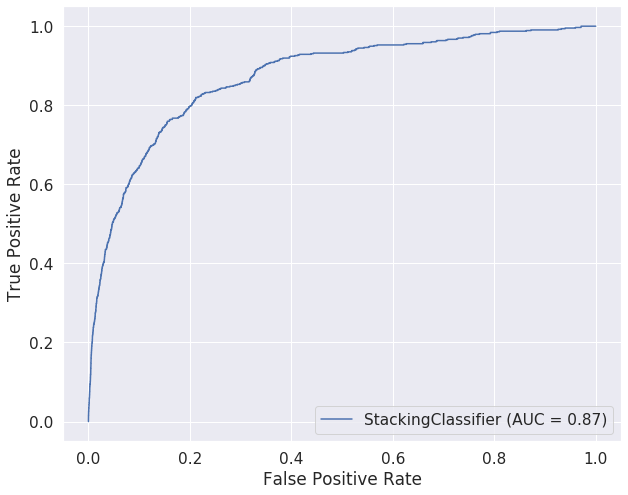

In [54]:
print("Stacked model roc_auc:", metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

plt.figure(figsize=(10,8))
metrics.plot_roc_curve(estimator=model, X=X_test, y=y_test, ax=plt.gca())
plt.show()